In [1]:
import matplotlib.pyplot as plt 
%matplotlib inline 
import numpy as np
import pandas as pd
import seaborn as sns
import re
sns.set()
from datetime import datetime 
from dateutil import parser
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn; seaborn.set()
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import fpmax
from mlxtend.preprocessing import TransactionEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score
import warnings
from sklearn.linear_model import LinearRegression
from pandas.tseries.offsets import BDay
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model as lm
from scipy.stats import uniform, randint
from sklearn import metrics
from sklearn.cluster import KMeans

# Linear Regression 

|   -       |continuous|categorical|
|-----------|-----------|---|
|**supervised**|**regression**|classification|
|**unsupervised**|dimension reduction|clustering|

## Motivation

Why are we learning linear regression?
- widely used 널리사용됨
- runs fast 빠른 실행
- easy to use (not a lot of tuning required) 사용편의성
- highly interpretable 해석 
- basis for many other methods 다른 방법들에 근거함

## Libraries

Will be using [Statsmodels](http://statsmodels.sourceforge.net/) for **teaching purposes** since it has some nice characteristics for linear modeling. However, in the later part, we will focus more on [scikit-learn](http://scikit-learn.org/stable/) since it provides significantly more useful functionality for machine learning in general.

If you don't have any of those libraries, please install it. 


# Multiple Linear Regression
Simple linear regression can easily be extended to include multiple features. This is called **multiple linear regression**:

$y = \beta_0 + \beta_1x_1 + ... + \beta_nx_n$

Each $x$ represents a different feature, and each feature has its own coefficient. In this case:

$y = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper$

Let's use Statsmodels to estimate these coefficients:

## 인덱스달아주기 

In [212]:
data = pd.read_csv('C:/Users/82106/Desktop/2020-2학기/데싸/data/Advertising.csv', index_col=0) # 보통 인덱스가 없지만 이 엑셀에는 인덱스가 있어서 0번째 컬럼 지정
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


## 세가지 변수 target: sales에 대해 다중선형회귀 분석시작
### 해석: 주어진 라디오와 신문광고 지출의 경우, TV광고 지출의 1,000 달러 증가는 45.765 widgerts 판매증가와 관련이 있다.
### For a given amount of Radio and Newspaper ad spending, an increase of $1000 in TV ad spending is associated with an increase in Sales of 45.765 widgets.

In [213]:
# create a fitted model with all three features
lm = smf.ols(formula='sales ~ TV + radio + newspaper', data=data).fit()

# print the coefficients
lm.params

Intercept    2.938889
TV           0.045765
radio        0.188530
newspaper   -0.001037
dtype: float64

### tv는 sale에 증가 / 뉴스페이퍼는 감소 (-니까)
- 뉴스페이퍼는 의미가없으니까 지워도 된다
- 전꺼보다 알스퀘어가 높아서 좋지만 뉴스페이퍼는 의미가없으니까 이 방법은 좋은 모델이 아니다
-  그래서 feature selection을 이용할것임
-  null hypothesis :  coefficient of the feature is significant
-  alternative hypothesis : coefficientt of the feature is not significant 

p-value가 0.05보다 작으면 reject the null hypothesis

0.05보다 크면 failing the null hypothesis 

--------------------------------------
이 결과로부터 우리가 배우는 몇 가지 주요 사항은 무엇인가?

- TV와 라디오는 중요한 **p-값**을 가지고 있는 반면, 신문은 그렇지 않다. 따라서 우리는 TV와 라디오에 대한 귀무 가설(이러한 특징과 판매 사이에 연관성이 없다는 것)을 기각하고, 신문사에 대한 귀무 가설을 기각하지 못한다.
- TV와 라디오 광고 지출은 모두 **가능성***과 관련이 있는 반면 신문 광고 지출은 **slightly 부정적으로 Sales와 연관되어 있다. (그러나 신문의 귀무 가설을 기각하지 못했기 때문에 이는 무관하다.)
- 이 모델은 이전 모델보다 **R-제곱**(0.897)이 더 높아 TV만 포함하는 모델보다 데이터에 더 잘 맞는 모델을 제공한다.
TV와 Radio는 유의미한 p-value 값을 가지고 있는 반면에, Newspaper는 그렇지 않다. 따라서 우리는 TV와 Radio에 대한 귀무가설을 기각하고 Newspaper에 대한 귀무가설을 기각하는데 실패한다.

TV와 Radio는 Sales에 대해 양의 상관관계를 갖고있고, 반면에 Newspaper는 음의상관관계를 갖고있다.

이 model은 R-Squared가 (0.897)로 높다. 따라서 TV만 포함하는 model 보다 데이터에 더 잘 맞는 model이다

In [214]:
# print a summary of the fitted model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 11 Dec 2020   Prob (F-statistic):           1.58e-96
Time:                        22:29:12   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The most common metrics to look at while selecting the model are:

모델을 비교할 때 이수치들을 사용하는데 비슷하면 다른수치로 또비교

|Statistic    | Criterion|
|---------    | ---------|
|R-Squared    | Higher the better ( >0.7) |
|Adj R-Squared| Higher the better |
|F-Statistic  |Higher the better ( >0.7) |
|Std. Error   |Closer to zero the better |
|t-statistic  |Should be greater 1.96 for p-value to be less than 0.05 |
|AIC (Akaike’s information criterion)         |Lower the better |
|BIC (Bayesian information criterion)          |Lower the better |
|MAPE (mean absolute percentage error) | Lower the better |
|MSE (mean squared error)          |Lower the better |


linear regression 에서는 알스퀘어 중요 / but only regression에서는 mse이용

## Feature Selection 컬럼선택

### 뉴스페이퍼 제거해준 모델


뉴스페이퍼가 있는 것은 의미가 없고 알스퀘어를 보았을 때 큰 차이가 없기 때문에 뉴스페이퍼 제거 모델이 더 좋다

In [215]:
# only include TV and Radio in the model
lm = smf.ols(formula='sales ~ TV + radio', data=data).fit()
lm.rsquared

0.8971942610828957

### 뉴스페이퍼 제거 x 모델


In [216]:
# add Newspaper to the model (which we believe has no association with Sales)
lm = smf.ols(formula='sales ~ TV + radio + newspaper', data=data).fit()
lm.rsquared

0.8972106381789522

###  radio * newspaper = [radio : newspaper] , [newspaper] / R값이 올랐다고 마냥 좋은게아니라, P값도 확인해야함

In [217]:
lm = smf.ols(formula='sales ~ TV + radio * newspaper', data=data).fit()
lm.rsquared
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     426.6
Date:                Fri, 11 Dec 2020   Prob (F-statistic):           3.25e-95
Time:                        22:29:14   Log-Likelihood:                -385.95
No. Observations:                 200   AIC:                             781.9
Df Residuals:                     195   BIC:                             798.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           3.1467      0.437      7.193      0.000       2.284       4.009
TV                  0.0458      0.001     32.746      0.000       0.043       0.049
radio               0.1801      0.015     11.930      0.000       0.150       0.210
newspaper          -0.0094      0.014     -0.688      0.492      -0.036       0.018
radio:newspaper     0.0003      0.000      0.678      0.498      -0.001       0.001
==============================================================================
Omnibus:                       60.978   Durbin-Watson:                   2.098
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.663
Skew:                          -1.344   Prob(JB):                     1.17e-33
Kurtosis:                       6.313   Cond. No.                     4.59e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.59e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## TV : radio = 묶여서 표현 [TV:radio] , [Tv:radio,+] / R값이 올랐다고 마냥 좋은게아니라, P값도 확인해야함
### tv, radio는 sales에 영향을 주는 feature다

어떤게 좋은 모델이냐고 묻는다면 높은 알스퀘어가 좋다. 0.930 이 가장 높아서 :랑 * 쓴게 가장 좋은모델

In [218]:
lm = smf.ols(formula='sales ~ TV : radio * newspaper', data=data).fit()
lm.rsquared
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     874.1
Date:                Fri, 11 Dec 2020   Prob (F-statistic):          3.79e-113
Time:                        22:29:14   Log-Likelihood:                -347.12
No. Observations:                 200   AIC:                             702.2
Df Residuals:                     196   BIC:                             715.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              8.6130      0.243     35.443      0.000       8.134       9.092
TV:radio               0.0016   5.48e-05     28.855      0.000       0.001       0.002
newspaper              0.0054      0.007      0.770      0.442      -0.008       0.019
TV:radio:newspaper -2.209e-06   1.27e-06     -1.734      0.084   -4.72e-06    3.03e-07
==============================================================================
Omnibus:                       74.805   Durbin-Watson:                   2.479
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              237.399
Skew:                          -1.547   Prob(JB):                     2.81e-52
Kurtosis:                       7.350   Cond. No.                     5.51e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.51e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Linear Regression in scikit-learn
#### p-value (p값) 과  confidence interval( 신뢰구간 ) 은 확인할 수 없다. R값만 확인가능

In [219]:
# create X and y (features : x , response : y) 종속변수가 수치형이라면 regression 
feature_cols = ['TV', 'radio', 'newspaper']
X = data[feature_cols]
y = data.sales

# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

# 사이킷런에서도 뉴스페이퍼는 음수로 나옴
# 위에 결과랑 똑같음

2.9388893694594067
[ 0.04576465  0.18853002 -0.00103749]


In [220]:
# pair the feature names with the coefficients
list(zip(feature_cols, lm.coef_))

[('TV', 0.04576464545539761),
 ('radio', 0.18853001691820462),
 ('newspaper', -0.0010374930424762972)]

## 새로운 값 지정하여 target(sales) 확인

In [221]:
# predict for a new observation
# 내가 새로운 값을 가지고 있다 
array=np.array([100,  25,  25]) # (tv: 100, radio : 25, newspaper : 25 씩 돈을 썼다면) 
array = array.reshape(1, -1) #make one dimension (only 1 new instance) -> 1차원 1요소
lm.predict(array)

array([12.20266701])

## R-Square / R값

In [222]:
# calculate the R-squared

lm.score(X, y)

0.8972106381789522

## 두가지 categorical 예측 True/False

In [223]:
# set a seed for reproducibility
np.random.seed(12345)

# create a Series of booleans in which roughly half are True
nums = np.random.rand(len(data))# random값을 만든다 , data의 index 수만큼 만듦
mask_large = nums > 0.5 # boolean으로 만들어줌 / 0.5보다크면 true

#### size가 0.5보다 크면 True
#### size가 0.5보다 작으면 False

In [224]:
mask_large

array([ True, False, False, False,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False,  True,  True,  True,
        True,  True,  True,  True, False, False, False,  True,  True,
        True,  True, False, False,  True,  True, False, False,  True,
        True, False,  True,  True,  True,  True,  True, False, False,
       False, False, False,  True, False,  True, False,  True,  True,
        True, False, False, False,  True,  True, False, False,  True,
       False, False,  True,  True,  True,  True,  True,  True, False,
       False,  True,  True, False, False,  True, False,  True,  True,
        True, False,  True, False, False, False, False,  True, False,
        True,  True,  True,  True, False,  True, False,  True,  True,
       False, False, False,  True, False, False,  True,  True,  True,
        True,  True,  True, False,  True, False, False,  True,  True,
        True,  True, False,  True,  True, False,  True,  True,  True,
       False, False,

In [225]:
# initially set Size to small, then change roughly half to be large
data['Size'] = 'small'
data.loc[mask_large, 'Size'] = 'large'
data.head()


,TV,radio,newspaper,sales,Size
1,230.1,37.8,69.2,22.1,large
2,44.5,39.3,45.1,10.4,small
3,17.2,45.9,69.3,9.3,small
4,151.5,41.3,58.5,18.5,small
5,180.8,10.8,58.4,12.9,large


### 머신러닝은 범주형(categorical)을 다루지 못하므로, 수치형으로 전환(Dummy)

In [226]:
# create a new Series called IsLarge
data['IsLarge'] = data.Size.map({'small':0, 'large':1})
data.head()

,TV,radio,newspaper,sales,Size,IsLarge
1,230.1,37.8,69.2,22.1,large,1
2,44.5,39.3,45.1,10.4,small,0
3,17.2,45.9,69.3,9.3,small,0
4,151.5,41.3,58.5,18.5,small,0
5,180.8,10.8,58.4,12.9,large,1


### 0.05의 의미는 

### large면 57.52만큼 올라간다 (1이니까) 

### small을 1로하고 large를 0로 하면 음수값이 된다
해석: How do we interpret the IsLarge coefficient? For a given amount of TV/Radio/Newspaper ad spending, being a large market is associated with an average increase in Sales of 57.42 widgets (as compared to a Small market, which is called the baseline level).

What if we had reversed the 0/1 coding and created the feature 'IsSmall' instead? The coefficient would be the same, except it would be negative instead of positive. As such, your choice of category for the baseline does not matter, all that changes is your interpretation of the coefficient.

In [227]:
# create X and y
feature_cols = ['TV', 'radio', 'newspaper', 'IsLarge'] # islarge는 수치형 
X = data[feature_cols]
y = data.sales

# instantiate, fit
lm = LinearRegression()
lm.fit(X, y)

# print coefficients
list(zip(feature_cols, lm.coef_))

[('TV', 0.045719820924362775),
 ('radio', 0.1887281431342787),
 ('newspaper', -0.0010976794483516079),
 ('IsLarge', 0.0574238508548277)]

## 두가지 이상 categoricla 예측 범주나누기

In [228]:
# set a seed for reproducibility
np.random.seed(123456)

# assign roughly one third of observations to each group
nums = np.random.rand(len(data))
mask_suburban = (nums > 0.33) & (nums < 0.66)
mask_urban = nums > 0.66
data['Area'] = 'rural'
data.loc[mask_suburban, 'Area'] = 'suburban'
data.loc[mask_urban, 'Area'] = 'urban'
data.head()

,TV,radio,newspaper,sales,Size,IsLarge,Area
1,230.1,37.8,69.2,22.1,large,1,rural
2,44.5,39.3,45.1,10.4,small,0,urban
3,17.2,45.9,69.3,9.3,small,0,rural
4,151.5,41.3,58.5,18.5,small,0,urban
5,180.8,10.8,58.4,12.9,large,1,suburban


## dummy변수를 추가하여, 기존의 데이터와 합친다.

In [229]:
# create three dummy variables using get_dummies, then exclude the first dummy column
area_dummies = pd.get_dummies(data.Area, prefix='Area').iloc[:, 1:]

# concatenate the dummy variable columns onto the original DataFrame (axis=0 means rows, axis=1 means columns)
data = pd.concat([data, area_dummies], axis=1)
data.head()

,TV,radio,newspaper,sales,Size,IsLarge,Area,Area_suburban,Area_urban
1,230.1,37.8,69.2,22.1,large,1,rural,0,0
2,44.5,39.3,45.1,10.4,small,0,urban,0,1
3,17.2,45.9,69.3,9.3,small,0,rural,0,0
4,151.5,41.3,58.5,18.5,small,0,urban,0,1
5,180.8,10.8,58.4,12.9,large,1,suburban,1,0


### suburban area면 sales는 감소한다. 

### urban area면 sales는 증가한다 .
Holding all other variables fixed, being a suburban area is associated with an average decrease in Sales of 106.56 widgets (as compared to the baseline level, which is rural).
Being an urban area is associated with an average increase in Sales of 268.13 widgets (as compared to rural).

In [230]:
# create X and y
feature_cols = ['TV', 'radio', 'newspaper', 'IsLarge', 'Area_suburban', 'Area_urban']
X = data[feature_cols]
y = data.sales

# instantiate, fit
lm = LinearRegression()
lm.fit(X, y)

# print coefficients
list(zip(feature_cols, lm.coef_))



[('TV', 0.04574401036331375),
 ('radio', 0.18786669552525811),
 ('newspaper', -0.0010876977267108138),
 ('IsLarge', 0.07739660749747909),
 ('Area_suburban', -0.10656299015958638),
 ('Area_urban', 0.26813802165220063)]

# Decision Tree 의사결정나무
Introduction to Decision Trees
- Regression Trees 연속형

  - Interpret the tree diagram

  - Prediction out-of samples data

- Classification Trees 범주형

  - Classification metrics
  
|-|continuous|categorical|
|---|---|---|
|**supervised**|**regression**|**classification**|
|**unsupervised**|dimension reduction|clustering|

## Regression trees vs Classification Trees

Classification trees are very similar to regression trees. Here is a quick comparison:

|regression trees|classification trees|
|---|---|
|predict a continuous response|predict a categorical response|
|predict using mean response of each leaf|predict using most commonly occuring class of each leaf|
|splits are chosen to minimize MSE|splits are chosen to minimize a different criterion (discussed below)|


### Step 1.1. Read the Data

In [231]:
# import pandas
import pandas as pd

# read in vehicle data
vehicles = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT4/master/data/used_vehicles.csv')

# print out data
vehicles

,price,year,miles,doors,type
0,22000,2012,13000,2,car
1,14000,2010,30000,2,car
2,13000,2010,73500,4,car
3,9500,2009,78000,4,car
4,9000,2007,47000,4,car
5,4000,2006,124000,2,car
6,3000,2004,177000,4,car
7,2000,2004,209000,4,truck
8,3000,2003,138000,2,car
9,1900,2003,160000,4,car


### Step 1.2. Convert categorical features into numerical

차와 트럭은 범주형이므로 0과 1로 바꿔준다

In [232]:
# convert car to 0 and truck to 1
vehicles['type'] = vehicles.type.map({'car':0, 'truck':1})

### Step 1.3. Select Features and Response

price를 Y로 뽑아준다

In [233]:
# select feature columns (every column except for the 0th column)
feature_cols = vehicles.columns[1:]

# define X (features) and y (response)
X = vehicles[feature_cols]
y = vehicles.price

In [234]:
X

,year,miles,doors,type
0,2012,13000,2,0
1,2010,30000,2,0
2,2010,73500,4,0
3,2009,78000,4,0
4,2007,47000,4,0
5,2006,124000,2,0
6,2004,177000,4,0
7,2004,209000,4,1
8,2003,138000,2,0
9,2003,160000,4,0


In [235]:
y

0     22000
1     14000
2     13000
3      9500
4      9000
5      4000
6      3000
7      2000
8      3000
9      1900
10     2500
11     5000
12     1800
13     1300
Name: price, dtype: int64

### Step 1.4. Split into train & test data

test data를 독립적으로 만들어주기 위해 데이터를 미리 분리한다

In [236]:
# split into train/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1) #0.7 - 0.3

### Step 1.5. Use one classifier (in this case, we use Decision Tree Regressor)

In [237]:
# import class, instantiate estimator, fit with training set
# the first 10 random data
from sklearn.tree import DecisionTreeRegressor
treereg = DecisionTreeRegressor(random_state=1)
treereg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

### Step 1.6. Test the model with test data (prediction)

x test를 가지고 예측해보고 preds에 저장한 후 y_test와 비교

In [238]:
# the remaining 4 random data for testing 
# make predictions
preds = treereg.predict(X_test)
# x test를 가지고 예측

# print predictions and actual values
print(preds)
print(y_test)

[5000. 1900. 1900. 5000.]
3     9500
7     2000
6     3000
2    13000
Name: price, dtype: int64


### Step 1.7. Measure the performance (For regression, we can use RMSE)

MSE는 작은 값을 찾는다

In [241]:
# use cross-validation to find best max_depth
from sklearn.model_selection import cross_val_score
for i in range(1,10):
    treereg = DecisionTreeRegressor(max_depth=i, random_state=1)
    scores = cross_val_score(treereg, X, y, cv=3, scoring='neg_mean_squared_error')
    print('max depth',i,':',np.mean(np.sqrt(-scores)))

max depth 1 : 4928.137464203802
max depth 2 : 4804.376788842713
max depth 3 : 4592.155425575525
max depth 4 : 4704.005269479739
max depth 5 : 4707.250588484563
max depth 6 : 4707.250588484563
max depth 7 : 4707.250588484563
max depth 8 : 4707.250588484563
max depth 9 : 4707.250588484563


## depth를 조절해가며(2~4)  rmse값이 제일 작은것을 best model로 선택

In [242]:
# the score is obtained using cross-validation method (equals to 3) and the score method is neg_MSE
treereg = DecisionTreeRegressor(max_depth=3, random_state=1)
scores = cross_val_score(treereg, X, y, cv=3, scoring='neg_mean_squared_error') # RMSE 

# CROSS VALIDATION 3 
np.mean(np.sqrt(-scores)) # 결과가 -가 될거라서

4592.155425575525

In [243]:
# max_depth=3 was best, so fit a tree using that parameter with ALL DATA
treereg = DecisionTreeRegressor(max_depth=3, random_state=1)
treereg.fit(X, y)

DecisionTreeRegressor(max_depth=3, random_state=1)

## Gini importance
- 높은 값이 높은 중요도를 나타낸다

- YEAR가 PRICE를 구분하기에 가장 좋은 Feature다.

- door나 type는 0이므로 그다지 중요하지 않다

In [244]:
# compute the "Gini importance" of each feature: the (normalized) total reduction of MSE brought by that feature
pd.DataFrame({'feature':feature_cols, 'importance':treereg.feature_importances_})

,feature,importance
0,year,0.798744
1,miles,0.201256
2,doors,0.000000
3,type,0.000000


## Tree 만들기 /  생성

In [245]:
# create a Graphviz file
from sklearn.tree import export_graphviz
with open("07_vehicles.dot", 'w') as f: # w 는 write /  " " 파일을 쓸거다
    f = export_graphviz(treereg, out_file=f, feature_names=feature_cols)
    # f는 treereg는 위에 만든 model , export는 내보낸다  , 우리가 선택한 열을 feature로 사용한다.

# at the command line, run this to convert to PNG:
# dot -Tpng 07_vehicles.dot -o tree.png
# Alternatively, you can search on the browser "graphviz online"
# Afterward, open the file "07_vehicles.dot" in a Word software
# copy and paste the text into the browser for "graphviz online"

In [246]:
! dot -Tpng 07_vehicles.dot -o tree.png

## 해석:
- YEAR이 중요해서 가장 맨위에 넣었다

- 어떻게 SPLITING POINT를 아는지는 데이터 마이닝에서 한다 

- SAMPLE은 데이터의 개수다 즉 SAMPLE의 개수가 2개고 VALUE는 1550.0 이라는 뜻

- SAMPLE을 다 더 하면 모든 데이터의 개수를 나타낸다

- DECISION TREE의 목적은 MSE를 MINIMIZE하는 것이다

- Depth은 뭘까 ? 우리는 depth을 3을 이용했다 위에 tree를 보면 depth이 3이다.
## Interpreting a tree diagram

How do we read this decision tree?

**Internal nodes:**

- "samples" is the number of observations in that node before splitting
- "mse" is the mean squared error calculated by comparing the actual response values in that node against the mean response value in that node
- first line is the condition used to split that node (go left if true, go right if false)

**Leaves:**

- "samples" is the number of observations in that node
- "value" is the mean response value in that node
- "mse" is the mean squared error calculated by comparing the actual response values in that node against "value"
"수치"는 해당 노드의 관측치 수입니다.
"값"은 해당 노드의 평균 반응 값이다.
"mse"는 해당 노드의 실제 반응 값을 "값"과 비교하여 계산된 평균 제곱 오차이다.

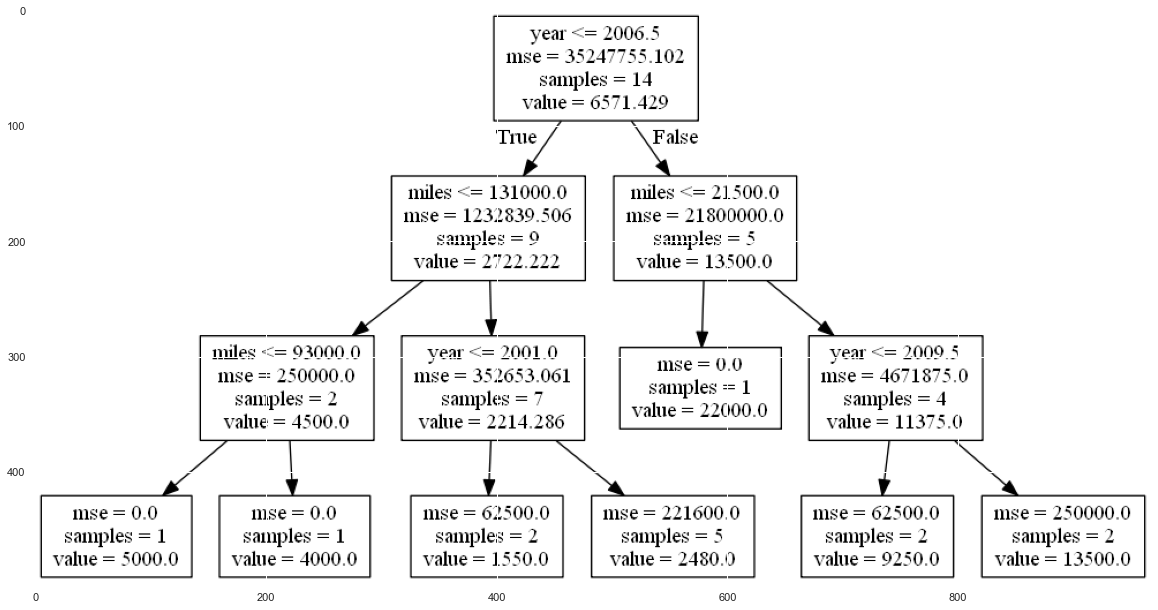

In [247]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
img = cv2.imread('tree.png') # IMAGE를 읽고 싶다
plt.figure(figsize = (20, 20))
plt.imshow(img)

### 추가적으로 데이터를 더 가져온다.

In [248]:
# read in out-of-sample data
oos = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT4/master/data/used_vehicles_oos.csv')
oos


,price,year,miles,doors,type
0,3000,2003,130000,4,truck
1,6000,2005,82500,4,car
2,12000,2010,60000,2,car


##  범주형 ( truck , car을 수치로 전환)

In [249]:
# convert car to 0 and truck to 1
oos['type'] = oos.type.map({'car':0, 'truck':1})

# print data
oos

,price,year,miles,doors,type
0,3000,2003,130000,4,1
1,6000,2005,82500,4,0
2,12000,2010,60000,2,0


In [250]:
# define X and y
X_oos = oos[feature_cols]
y_oos = oos.price

In [251]:
# make predictions on out-of-sample data
preds = treereg.predict(X_oos)

# print predictions 
print(preds)


[ 4000.  5000. 13500.]


###  실제 값

In [252]:
# print actual values
print(y_oos.values)

[ 3000  6000 12000]


###  실제값과 예측값 비교

In [253]:
# print RMSE
np.sqrt(metrics.mean_squared_error(y_oos, preds))

1190.2380714238084

### 실제값과 설정한 예측값 비교

In [254]:
# print RMSE for the tree you created! -> 나의 예측 값 
your_preds = [4000, 5000, 13500]
np.sqrt(metrics.mean_squared_error(y_oos, your_preds))

1190.2380714238084

# Classification trees 의사결정나무범주
## Splitting criteria for classification trees

Here are common options for the splitting criteria:

- **classification error rate:** fraction of training observations in a region that don't belong to the most common class
- **Gini index:** measure of total variance across classes in a region
- **cross-entropy:** numerically similar to Gini index, but uses logarithms

Which to use?

- When growing a tree, Gini index and cross-entropy are better measures of "node purity" than classification error rate. The Gini index is faster to compute than cross-entropy, so it is generally preferred (and is used by scikit-learn by default).
- When pruning a tree, classification error rate is preferable in order to maximize predictive accuracy.

Why do some splits result in leaves with the same predicted class?

- The split was performed to increase node purity, even though it didn't reduce the classification error. error를 줄여주지 않더라고 purity는 높여줘서
- Node purity is important because we're interested in the class proportions among the observations in each region.


- gini = 0 --> Error가 없다.
- gini > 0 --> Error가 있다.

## Handling categorical predictors

Some implementations of classification trees will allow you to handle categorical predictors **without creating dummy variables**. When splitting on a categorical predictor, they will try splitting on **every possible combination of categories** to find the best split. In the example above, "ChestPain:bc" means that the left-hand branch consists of observations with the second and third ChestPain categories, and the right-hand branch consists of remaining observations.

**Unfortunately, scikit-learn's classification tree implementation does not support this approach.** Instead, here's how you can handle categorical predictors:

- If a predictor only has **two possible values**, code it as a single binary variable (0 or 1). Since it's treated as a number, splits will naturally occur at 0.5.
- If a predictor has **three or more possible values that are ordered**, code it as a single variable (1, 2, 3, etc). Splits will naturally occur at 1.5, 2.5, etc.
- If a predictor has **three or more possible values that are unordered**, create dummy variables and drop one level as usual. The decision tree won't know that the dummy variables are related to one another, but that shouldn't matter in terms of predictive accuracy.
- If a predictor has **thousands of possible unordered values**, then it may be best to code it as a single variable (1, 2, 3, etc) instead of using dummy variables to minimize the size of the resulting model. ([reference](http://stackoverflow.com/a/18736132/1636598))
더미 쓰지 말고 숫자부여

We'll see examples of these strategies below.

In [127]:
# read in the data
titanic = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT4/master/data/titanic.csv')
titanic.head(5)

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [128]:
# look for missing values
titanic.isnull().sum()

survived      0
pclass        0
name          0
sex           0
age         177
sibsp         0
parch         0
ticket        0
fare          0
cabin       687
embarked      2
dtype: int64

In [129]:
# encode sex feature
titanic['sex'] = titanic.sex.map({'female':0, 'male':1})

# fill in missing values for age
titanic.age.fillna(titanic.age.mean(), inplace=True)

# print the updated DataFrame
titanic.head(5)

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


## dummy사용

In [130]:
# create three dummy variables using get_dummies
pd.get_dummies(titanic.embarked, prefix='embarked').head(5)

,embarked_C,embarked_Q,embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [131]:
# create three dummy variables, drop the first dummy variable, and store this as a DataFrame
embarked_dummies = pd.get_dummies(titanic.embarked, prefix='embarked').iloc[:, 1:]

# concatenate the two dummy variable columns onto the original DataFrame
# note: axis=0 means rows, axis=1 means columns
titanic = pd.concat([titanic, embarked_dummies], axis=1)

# print the updated DataFrame
titanic.head(5)

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,embarked_Q,embarked_S
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,0,0
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,0,1
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,0,1


In [132]:
# create a list of feature columns
feature_cols = ['pclass', 'sex', 'age', 'embarked_Q', 'embarked_S']

# define X and y
X = titanic[feature_cols]
y = titanic.survived

## Test_size  0.3-0.7

In [134]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

## 정확도

In [135]:
    
from sklearn.tree import DecisionTreeClassifier
for i in range(1,12):
    treeclf2 = DecisionTreeClassifier(max_depth= i, random_state=1)
    treeclf2 = treeclf2.fit(X_train,y_train)
    y_pred = treeclf2.predict(X_test)
    print( "Accuracy when depth is",i,':',metrics.accuracy_score(y_test, y_pred))

Accuracy when depth is 1 : 0.753731343283582
Accuracy when depth is 2 : 0.7350746268656716
Accuracy when depth is 3 : 0.7723880597014925
Accuracy when depth is 4 : 0.753731343283582
Accuracy when depth is 5 : 0.7611940298507462
Accuracy when depth is 6 : 0.7574626865671642
Accuracy when depth is 7 : 0.7686567164179104
Accuracy when depth is 8 : 0.7761194029850746
Accuracy when depth is 9 : 0.7649253731343284
Accuracy when depth is 10 : 0.7723880597014925
Accuracy when depth is 11 : 0.7574626865671642


In [63]:
# fit a classification tree with max_depth=3 on all data

treeclf = DecisionTreeClassifier(max_depth=3, random_state=1)
treeclf.fit(X, y)

DecisionTreeClassifier(max_depth=3, random_state=1)

In [285]:
# create a Graphviz file
with open("07_titanic.dot", 'w') as f:
    f = export_graphviz(treeclf, out_file=f, feature_names=feature_cols)

In [286]:
! dot -Tpng 07_titanic.dot -o titanictree.png

### Notice the split in the bottom right, which was made only to increase node purity.
### 8는 not survive 160 survive

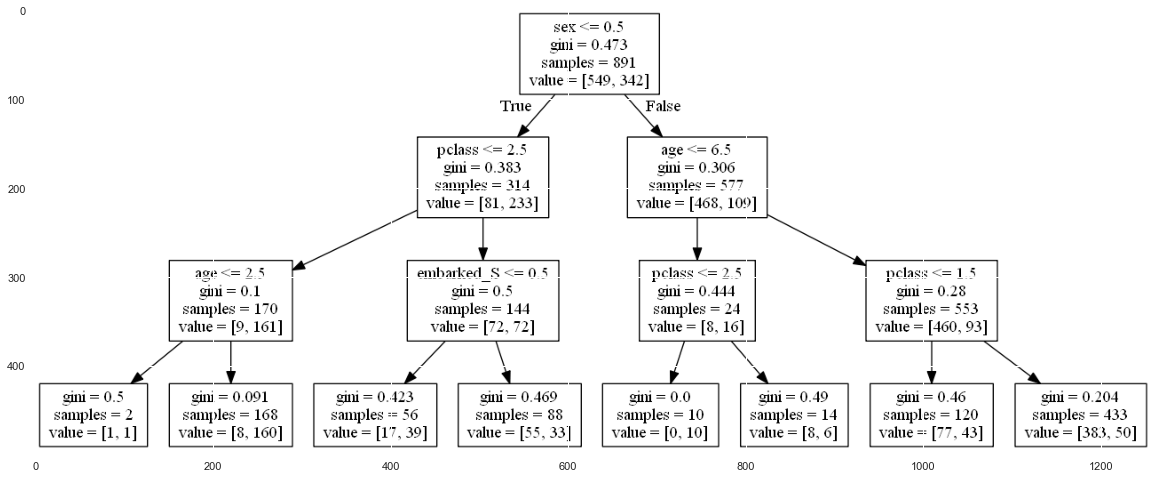

In [287]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
img = cv2.imread('titanictree.png')
plt.figure(figsize = (20, 20))
plt.imshow(img)

## feature importance

In [288]:
# compute the feature importances
pd.DataFrame({'feature':feature_cols, 'importance':treeclf.feature_importances_})

,feature,importance
0,pclass,0.242664
1,sex,0.655584
2,age,0.064494
3,embarked_Q,0.000000
4,embarked_S,0.037258


In [65]:
# Create Decision Tree classifer object
treeclf2 = DecisionTreeClassifier()

# Train Decision Tree Classifer
treeclf2 = treeclf2.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = treeclf2.predict(X_test)

## Accuracy

In [291]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7574626865671642


## confusion matrix / 정확도는 혼동행렬을 찾은 후에 얻을 수 있다.

In [292]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
#True positive : 130
#True negative : 73
#False positive : 23
#False negative : 42

[[130  23]
 [ 42  73]]


## performance matrix ( 분류보고서 ) 에 모든 중요한 성과지표가 표시되있다.
accuracy : 0.76

|-|predicted|class|
|---|---|---|
|actual| True positive(TP)|False Negative(FN)|
|class| False positive(FP)|True Negative(TN)|
TP, TN이 높으면 좋은 모델이다.

- Senstivity(Recall) = TP / (TP + FN) 
- Specificity = TN / (TN + FP)
- Precision = TP / (TP + FP)
- Negative Predictive value = TN / (TN + FN)
- Accuracy = (TP + TN) / (TP + TN + FP + FN)



In [293]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.85      0.80       153
           1       0.76      0.63      0.69       115

    accuracy                           0.76       268
   macro avg       0.76      0.74      0.75       268
weighted avg       0.76      0.76      0.75       268



## 혼동행렬 성과지표 

뭘 알고싶은지에 따라 선택해서 값을 보기

Classification :



|-|1|0|
|---|---|---|
|1| A|B|
|0|C|D|


True Positive, False Positive, True Negative, False Negative Above, these are A, C, D, and B respectively.

             
| pred \ actual     | Yes | No|
|-----------|--------|--------|
| Yes     |  9     |  2     |
| No    |  3     |  3     |


**Accuracy** is the percentage of correctly classifies instances out of all instances. It is more useful on a binary classification than multi-class classification problems because it can be less clear exactly how the accuracy breaks down across those classes (e.g. you need to go deeper with a confusion matrix). 

$\frac{((A+D)}{Total}$   = (9+3) / 17 = 0.7059

no information rate is the average loss of the variables over all combinations of the response.

**ROC metrics** are only suitable for binary classification problems (e.g. two classes).
To calculate ROC information, you must change the summaryFunction in your trainControl to be twoClassSummary. This will calculate the Area Under ROC Curve (AUROC) also called just Area Under curve (AUC), sensitivity and specificity.
ROC is actually the area under the ROC curve or AUC. The AUC represents a models ability to discriminate between positive and negative classes. An area of 1.0 represents a model that made all predicts perfectly. An area of 0.5 represents a model as good as random.

ROC can be broken down into *sensitivity* and *specificity*. A binary classification problem is really a trade-off between sensitivity and specificity.




**Sensitivity** is the true positive rate also called the **Recall**. It is the number instances from the positive (first) class that actually predicted correctly. High sensitivity would suggest a low type II error rate (see below), or high statistical power. Also known as true positive rate. 

$\frac{((A)}{(A + C)}$ = 9 / (9+3) = 0.75


**Specificity** is also called the true negative rate. Is the number of instances from the negative class (second) class that were actually predicted correctly. High specificity would suggest a low type I error rate (see below). Also known as true negative rate. 

$\frac{((D)}{(D + B)}$ = 3 / (3 + 2) = 0.6

**Positive Predictive Value (PPV)**, called as **Precision** proportion of true positives of those that are predicted positives: 

$\frac{((A)}{(A + B)}$

In the above example this would be 9/(9+2), about 0.8182.

**Negative Predictive Value (NPV)** proportion of true negatives of those that are predicted negative: 

$\frac{((D)}{(C + D)}$ In the above example, this would be 3 / (3+3) = 0.5


Alternative metrics

**Lift Ratio** of positive predictions given actual positives to the proportion of positive predictions out of the total: (A/(A+C))/((A+B)/Total). In the above example this would be (9/(9+3))/((9+2)/17)) or 1.1591.

**F Score (F1 score)** Harmonic mean of precision and recall: 2(PrecisionRecall)/(Precision+Recall). In the above example this would be 2(.8182.75)/(.8182+.75). Also known as F1 score.

**Type I Error Rate (false positive rate)** proportion of true negatives that are incorrectly predicted positive: B/B+D. In the above example this would be 2/5, about 0.6. Also known as alpha.

**Type II Error Rate (false negative rate)** proportion of true positives that are incorrectly predicted negative: C/C+A. In the above example this would be 3/12, about 0.25. Also known as beta.

**Prevalence**  (A+C) / (A + B + C + D) (9+3) / 17 = 0.7059

**Detection Rate** (A) / total 9 / 17 = 0.5294

**Detection Prevalence** (A + B) / total 11 / 17 = 0.6471

**Balanced Accuracy** (Sensitivity + specificity) / 2 (0.6 + 0.75) / 2 = 0.675


## Wrapping up decision trees

Here are some advantages and disadvantages of decision trees that we haven't yet talked about:

**Advantages:**

- Can be specified as a series of rules, and are thought to more closely approximate human decision-making than other models
- Non-parametric (will do better than linear regression if relationship between predictors and response is highly non-linear)
- 일련의 규칙으로 지정될 수 있으며, 다른 모델보다 인간의 의사결정에 더 근접하- 게 근접한 것으로 생각된다.
- 비모수(예측 변수와 반응 변수의 관계가 비선형인 경우 선형 회귀보다 더 효과적임)

**Disadvantages:**

- Small variations in the data can result in a completely different tree
- Recursive binary splitting makes "locally optimal" decisions that may not result in a globally optimal tree
- Can create biased trees if the classes are highly imbalanced
- 데이터의 작은 변화로 인해 트리가 완전히 달라질 수 있음
- 재귀적 이진 분할은 "로컬하게 최적" 결정을 내리며, 전체적으로 최적의 트리를 생성하지 않을 수 있음
- 클래스가 고도로 불균형한 경우 편향된 트리를 만들 수 있음
Note that there is not just one decision tree algorithm; instead, there are many variations. A few common decision tree algorithms that are often referred to by name are C4.5, C5.0, and CART. (More details are available in the [scikit-learn documentation](http://scikit-learn.org/stable/modules/tree.html#tree-algorithms-id3-c4-5-c5-0-and-cart).) scikit-learn uses an "optimized version" of CART.

# Unsupervised Learning : clustering(클러스터링 강의자료) - K-mean

 어떤 데이터가 CENTROID와 가까운지 찾을수 있다. 2,4,3 의 평균 = 4 / 5,4,3=4

In [294]:
# ------------------------------------------
# Centroid is the center point of some data
# EXERCISE: Compute the centroid of the following data
#           [2, 5], [4, 4], [3, 3]
# ------------------------------------------

d = np.array([[2, 5], [4, 4], [3, 3]])
x, y = d.mean(axis=0)

In [295]:
print(x,y)

3.0 4.0


In [296]:
#import the library
from sklearn.datasets import make_blobs
#from sklearn.datasets.samples_generator import make_blobs

In [297]:
# create a random data with 2 features (x1 & x2), centroid 1
# by default, it generates 100 random data
X, y = make_blobs(n_features=2, centers=1) 

Text(0.5, 1.0, 'centers = 1')

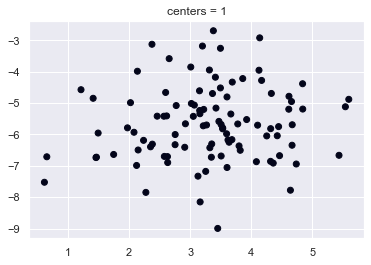

In [298]:
#plot the X and y (plot 1)
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y) # 열 0과 열1이용하여 
plt.savefig('centers_1.png')
plt.title('centers = 1') # CENTER는Y가 된다


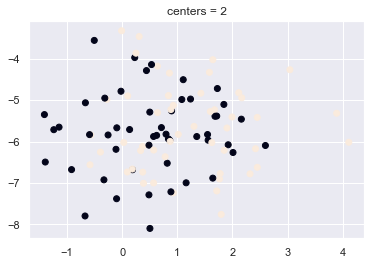

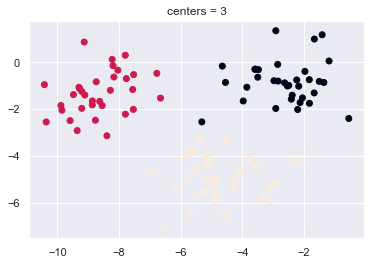

In [299]:
# plot 2    
X, y = make_blobs(n_features=2, centers=2) # number of features (x1 & x2), centroid 2
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('centers = 2')

# plot 3
X, y = make_blobs(n_features=2, centers=3) # number of features (x1 & x2), centroid 3
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('centers = 3')

plt.show()

In [300]:
# Set the parameters of make_blobs
X,y = make_blobs(centers=4, n_features=2, n_samples=200, random_state=0, cluster_std=0.7)
print(X[:10],y[:10])

[[ 2.26403424  1.82613379]
 [-0.97647444  2.59138889]
 [ 1.10046838  4.02254067]
 [-2.82715074  7.11970523]
 [ 1.53393915  0.31915668]
 [ 0.98362009  5.55389667]
 [-1.74452433  2.98606238]
 [ 0.35482006  2.9172298 ]
 [ 1.83747356  5.14545322]
 [ 1.48663347  4.39407536]] [1 2 0 3 1 0 2 0 0 0]


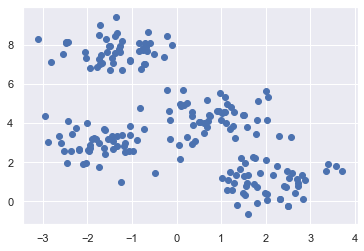

In [301]:
plt.scatter(X[:,0],X[:,1]);

In [302]:
#load the library for K-means algorithm
from sklearn.cluster import KMeans

In [303]:
# set k = 4 and fit the k-means algorithm to the data (X)
model = KMeans(4) # 4개의 CENTORID
model.fit(X) # X는 DATA POINT 

KMeans(n_clusters=4)

In [304]:
#print the cluster centers and the labels
print(model.cluster_centers_) # CENTROID 
print(model.labels_)

# Result from the clustering

[[ 0.86008475  4.31501411]
 [ 2.07464749  0.9869902 ]
 [-1.36512238  7.70188306]
 [-1.70639178  2.9104771 ]]
[1 3 0 2 1 0 3 0 0 0 0 1 3 3 1 0 2 2 2 1 2 3 1 3 1 1 2 1 1 0 2 0 3 1 3 0 3
 0 0 2 2 2 2 0 1 3 0 2 2 0 2 3 3 2 0 2 3 1 0 1 2 0 1 0 2 0 1 2 3 3 1 1 0 0
 3 2 3 3 1 1 2 0 1 3 3 0 0 1 3 3 2 2 2 0 0 1 3 2 0 0 2 1 1 2 2 3 0 1 1 0 2
 3 3 1 1 0 3 3 2 0 2 3 0 1 0 3 0 3 1 0 3 1 0 2 2 3 2 2 1 2 1 3 1 1 3 1 0 1
 3 2 2 2 0 3 1 0 2 3 2 1 2 1 1 3 3 2 0 1 1 3 1 0 3 2 2 2 0 0 3 0 0 1 0 1 0
 3 3 2 0 2 1 1 0 2 3 3 3 0 2 1]


In [1]:
# plotting the 4 clusters with the center point (centroid)
plt.scatter(X[:,0],X[:,1], c=model.labels_);
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], s=100, color="red"); # Show the centres

NameError: name 'plt' is not defined

### 클러스터링 accuracy

In [306]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y, model.labels_)
print("Accuracy score is", acc)

# 실제값과 예측값이 달라서 정확도가 낮음

Accuracy score is 0.5


### 모델을 다시 만들어서 클러스터링 정확도 높이기.

In [ ]:
# check the results from the clustering
clusters = model.fit_predict(X)
clusters

In [308]:
# Fix permuted labels
from scipy import stats
labels = np.zeros_like(clusters) #prepare an array with the same size of clusters and put the value 0
for i in range(4):
    mask = (clusters == i) #mask = TRUE if the clusters equal to the i
    labels[mask] = stats.mode(y[mask])[0] #choose the mode (the most common value) and put it on the label

array([1, 2, 0, 3, 1, 0, 2, 0, 0, 0, 0, 1, 2, 2, 1, 0, 3, 3, 3, 1, 3, 2,
       1, 2, 1, 1, 3, 1, 1, 0, 3, 0, 2, 1, 2, 0, 2, 0, 0, 3, 3, 3, 3, 0,
       1, 2, 0, 3, 3, 0, 3, 2, 2, 3, 0, 3, 2, 1, 0, 1, 3, 0, 1, 0, 3, 0,
       1, 3, 2, 2, 1, 1, 0, 0, 2, 3, 2, 2, 1, 1, 3, 0, 1, 2, 2, 0, 0, 1,
       2, 2, 3, 3, 3, 0, 0, 1, 2, 3, 0, 0, 3, 1, 1, 3, 3, 2, 0, 1, 1, 0,
       3, 2, 2, 1, 1, 0, 2, 2, 3, 0, 3, 2, 0, 1, 0, 2, 0, 2, 1, 0, 2, 1,
       0, 3, 3, 2, 3, 3, 1, 3, 1, 2, 1, 1, 2, 1, 0, 1, 2, 3, 3, 3, 0, 2,
       1, 0, 3, 2, 3, 1, 3, 1, 1, 2, 2, 3, 0, 1, 1, 2, 1, 0, 2, 3, 3, 3,
       0, 0, 2, 0, 0, 1, 0, 1, 0, 2, 2, 3, 0, 3, 1, 1, 0, 3, 2, 2, 2, 0,
       3, 1])

In [ ]:
colors = np.array(['red','blue'])
plt.figure()
plt.scatter(result.iloc[:,0], result.iloc[:,1], c=colors[clusters], s=50, alpha = 0.4)
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], c='green', marker='+', s=300)
plt.xlabel(result.columns[0])
plt.ylabel(result.columns[1])
plt.show()

### 클러스터링 정확도

In [309]:
print("Accuracy score is", accuracy_score(y, labels))

Accuracy score is 0.99


###  Iris data로 클러스터링

In [310]:
from sklearn import datasets
# Import iris data
iris = datasets.load_iris()


In [311]:
d = iris.data # data should be in array

np.random.seed(0)

In [312]:
# Run KMeans
est = KMeans(n_clusters=3, init='random') #generate a k-means model. you can change from 'random' to 'k-means++' for (sometimes) a better result
# init : initial center point
est.fit(d) #fit into the data d
y_kmeans = est.predict(d) #put the cluster label into the variable y_k-means

In [313]:
y_kmeans[0:5] # 3 cluster로 설정해줘서 0,1,2 3개의 값을 가진다.

array([2, 2, 2, 2, 2])

### inertia : within-cluster sum-of-squares (WSS)
예측오차

In [314]:
est.fit_predict(d)
inertia = est.inertia_
inertia

78.851441426146

Text(0, 0.5, 'sepal length (cm)')

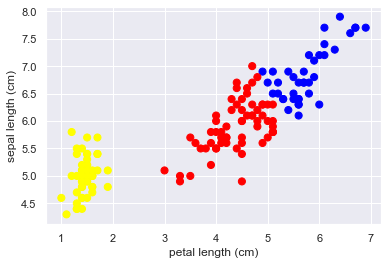

In [315]:
colors = np.array(['red','blue','yellow']) # group number 0,1,2
plt.figure()
plt.scatter(d[:, 2], d[:, 0], c=colors[y_kmeans], s=50) # 열2 : sepal length 열0: petal length  색깔은 y_kmeans의 값으로 논다
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[0])

In [316]:
centers = est.cluster_centers_ # get the cluster center
centers




array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

### 군집에 중심점에 표시를한다.

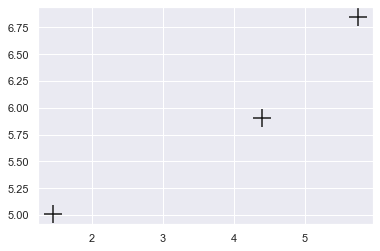

In [317]:
plt.scatter(centers[:, 2], centers[:, 0], c='k', marker='+', s=300) # s는 size # 열 2(sepal length), 열 0(petal length)

### 군집에서 중심값이 어디인지 표시할 수 있다.

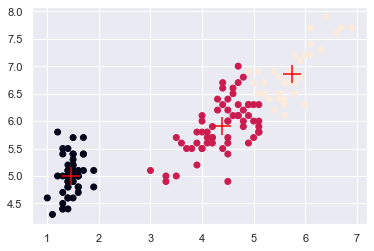

In [318]:
plt.scatter(d[:,2],d[:,0], c=est.labels_);
plt.scatter(est.cluster_centers_[:,2], est.cluster_centers_[:,0], c='red', marker='+', s=300); # Show the centres

## 클러스터링 subplot

Text(0.5, 0, 'petal width (cm)')

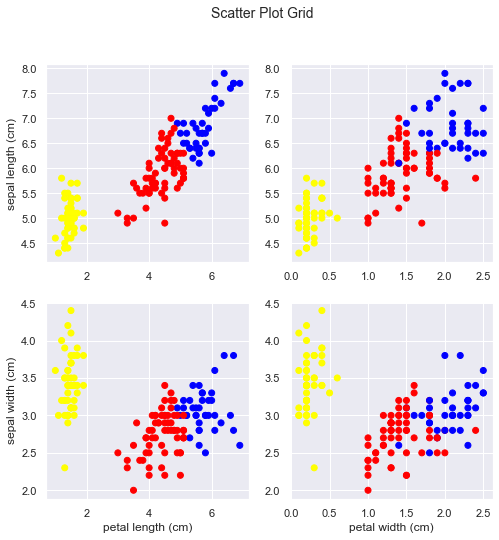

In [319]:
#================================
# Option #1: Scatter Plot Grid
plt.figure(figsize=(8, 8))
plt.suptitle('Scatter Plot Grid',  fontsize=14)
# Upper Left
plt.subplot(221)
plt.scatter(d[:,2], d[:,0], c = colors[y_kmeans])
plt.ylabel(iris.feature_names[0])

# Upper Right
plt.subplot(222)
plt.scatter(d[:,3], d[:,0], c = colors[y_kmeans])

# Lower Left
plt.subplot(223)
plt.scatter(d[:,2], d[:,1], c = colors[y_kmeans])
plt.ylabel(iris.feature_names[1])
plt.xlabel(iris.feature_names[2])

# Lower Right
plt.subplot(224)
plt.scatter(d[:,3], d[:,1], c = colors[y_kmeans])
plt.xlabel(iris.feature_names[3])

#================================

### K-mean ++ 로 바꾸면 결과는 같다 = 데이터크기가 그다지 크지 않아서
### 3D clustering 클러스터링

Text(0.5, 0, 'petal length (cm)')

<Figure size 432x288 with 0 Axes>

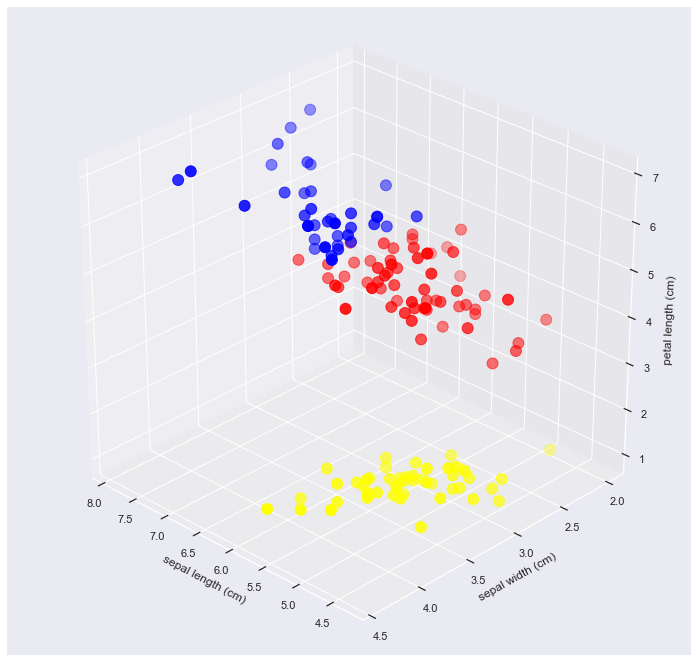

In [320]:
# Option #2: 3d plot
from mpl_toolkits.mplot3d import Axes3D
plt.suptitle('3d plot', fontsize=15)
ax = Axes3D(plt.figure(figsize=(10, 9)), rect=[.01, 0, 0.95, 1], elev=30, azim=134)
ax.scatter(d[:,0], d[:,1], d[:,2], c = colors[y_kmeans], s=120)
ax.set_xlabel(iris.feature_names[0])#'Sepal Length'
ax.set_ylabel(iris.feature_names[1])#'Sepal Width'
ax.set_zlabel(iris.feature_names[2])#'Petal Length'
# Modified from the example here: 
# http://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_iris.html

## 엘보우 Elbow Method = Inertia is sum of squared distances of samples to their closest cluster center.
inertia는 가장 가까운 클러스터 중심까지의 표본 거리 제곱의 합이다.
## And the Elbow method looks at the inertia as a function of the number of clusters. One should choose a number of clusters so that adding another cluster doesn’t improve much better the inertia.4
그리고 엘보우 방법은 inertia을 군집 수의 함수로 본다. 군집을 하나 더 추가해도 inertia이 크게 개선되지 않도록 군집을 여러 개 선택해야 한다.
- xij: 모든 data (i는 x axis j는 y축) 

center point를 찾고 싶다. 각각의 데이터와 센터포인트와의 거리를 찾고 싶다 (min)
만약에 우리가 작은 걸 가진다면 그게 best result



In [321]:
#Elbow Method
seed = 0
elbow = dict() # create a dictionary (key, value)
for k in range(1,11): # k는 1~10 까지 
    estimator = KMeans(n_clusters = k,random_state=seed)
    res = estimator.fit_predict(X)
    inertia = estimator.inertia_ # error
    elbow[k] = inertia


In [322]:
elbow # inertia for each k

{1: 681.3705999999996,
 2: 152.34795176035797,
 3: 78.851441426146,
 4: 57.25600931571815,
 5: 46.44618205128204,
 6: 39.03998724608725,
 7: 34.299712121212146,
 8: 30.014398496240617,
 9: 28.03690635345049,
 10: 26.534529220779234}

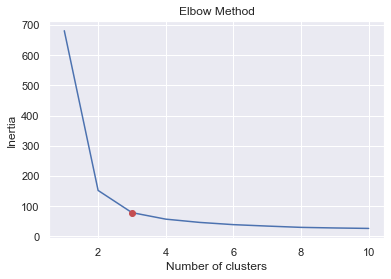

In [323]:
elbow_df = pd.Series(elbow)
ax = elbow_df.plot(title = 'Elbow Method')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Inertia')
plt.plot(3,elbow_df[3],'ro')

## Average Silouette method - 실루엣
- The [Silhouette Score](https://en.wikipedia.org/wiki/Silhouette_(clustering)) is calculated using the mean intra-cluster distance (`a`) and the mean nearest-cluster distance (`b`) for each sample. The Silhouette Coefficient for a sample is `(b - a) / max(a, b)`. It measures the quality of a clustering.
----------------------------------------------
실루엣 점수는 각 표본의 평균 클러스터 내 거리(a)와 가장 가까운 클러스터 거리(b)를 사용하여 계산한다. 표본의 실루엣 계수는 (b - a) / max(a, b)이다. 군집화의 품질을 측정한다.

a는 cluster에 평균이다
b는 두개 cluster의 distance이다.

----------------------------------------
- When you calculate the silhouette score using sklearn you get out a single number. This is the average silhouette score for all of the individual observations.

- In general, we want separation to be high and cohesion to be low. This corresponds to a value of SC close to +1.

- A negative silhouette coefficient means the cluster radius is larger than the space between clusters, and thus clusters overlap. Another way to think about this is that negative values indicate that non-assigned clusters are more similar than the assigned cluster.

---------------------------------------------------
sklearn을 사용하여 실루엣 점수를 계산하면 한 개의 숫자가 나온다. 이것은 모든 개별 관측치의 평균 실루엣 점수다.

일반적으로 우리는 분리가 높고 응집력이 낮기를 원한다. 이는 +1에 가까운 SC 값에 해당한다.

음의 실루엣 계수는 군집 반경이 군집 사이의 공간보다 크므로 군집들이 겹치는 것을 의미한다. 이것에 대해 생각할 수 있는 또 다른 방법은 음수 값은 할당되지 않은 클러스터가 할당된 클러스터보다 더 유사하다는 것을 나타낸다.

In [ ]:
X=X.values

In [324]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

For n_clusters = 2 The average silhouette_score is : 0.681046169211746
For n_clusters = 3 The average silhouette_score is : 0.5528190123564091
For n_clusters = 4 The average silhouette_score is : 0.4980505049972866
For n_clusters = 5 The average silhouette_score is : 0.4887488870931048
For n_clusters = 6 The average silhouette_score is : 0.3648340039670018
For n_clusters = 7 The average silhouette_score is : 0.3544579925316741
For n_clusters = 8 The average silhouette_score is : 0.3487345377219377
For n_clusters = 9 The average silhouette_score is : 0.31944608860386825
For n_clusters = 10 The average silhouette_score is : 0.3236346021561444


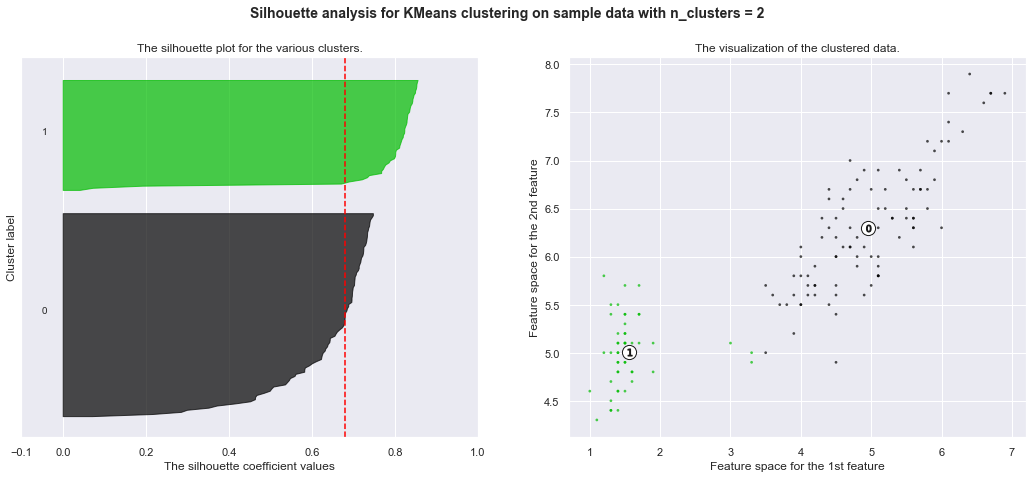

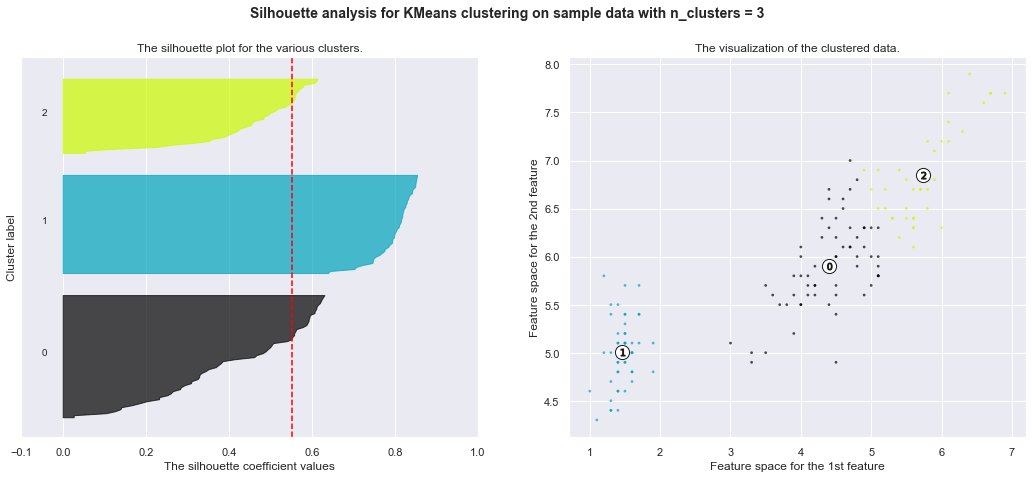

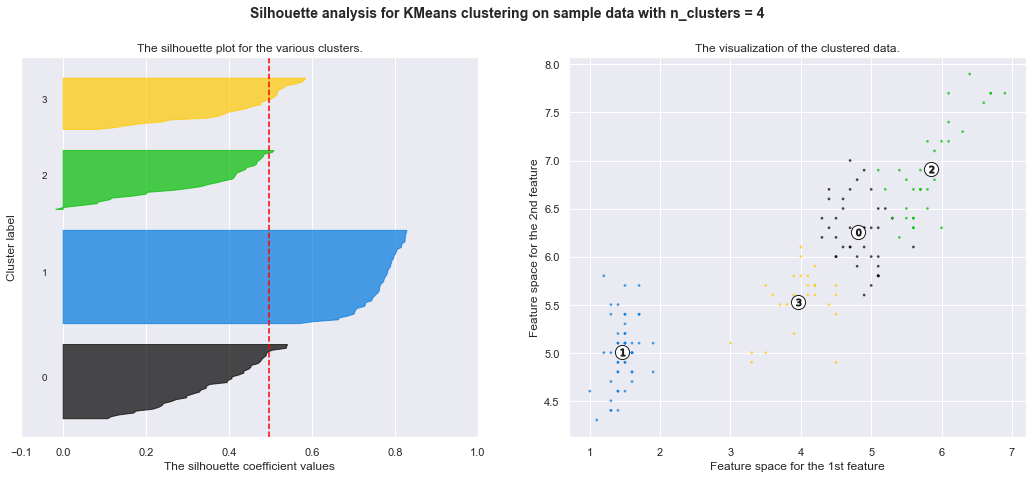

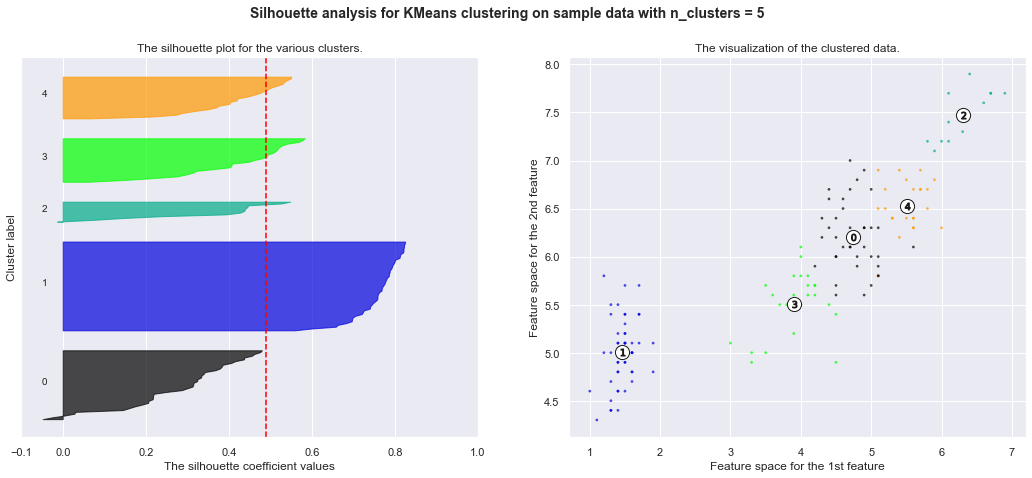

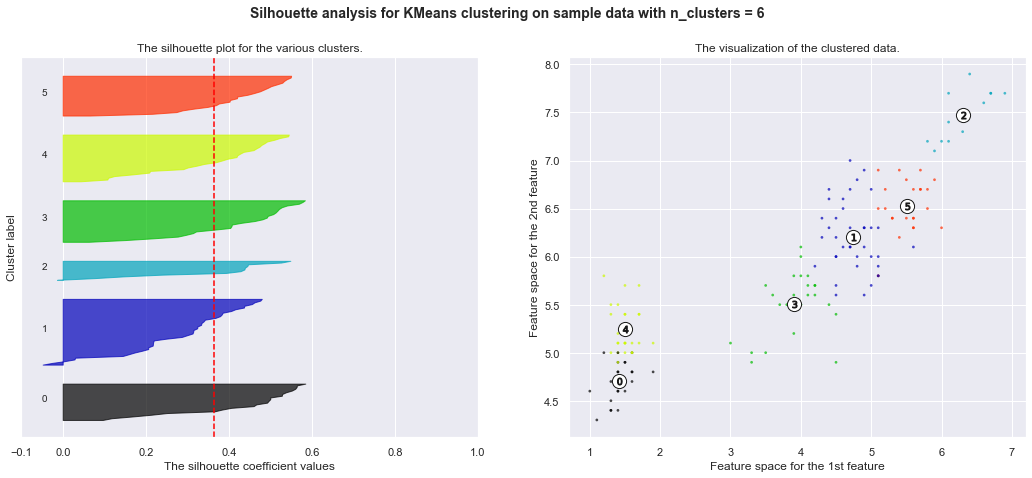

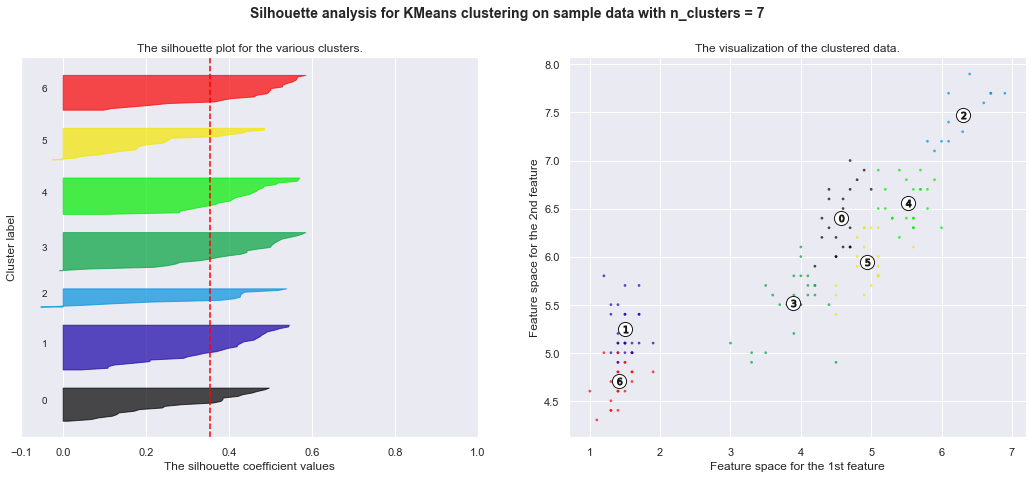

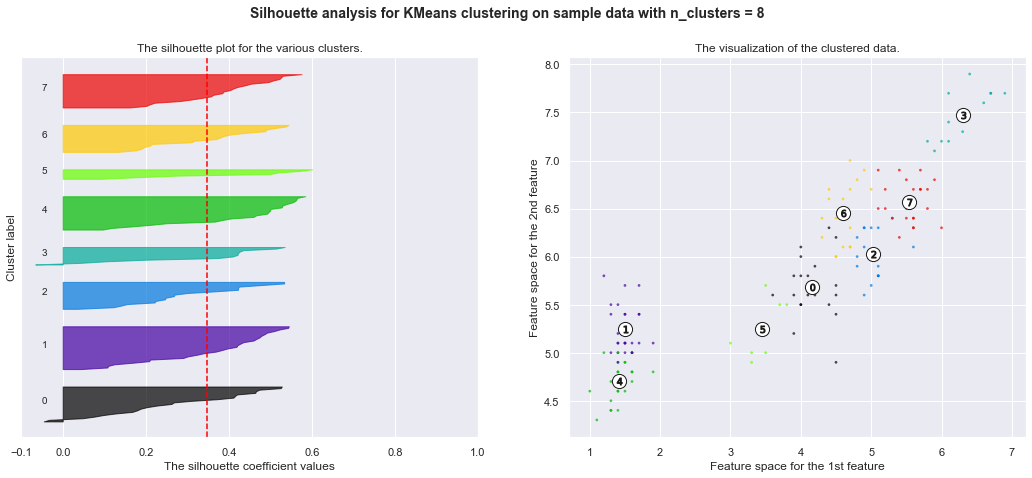

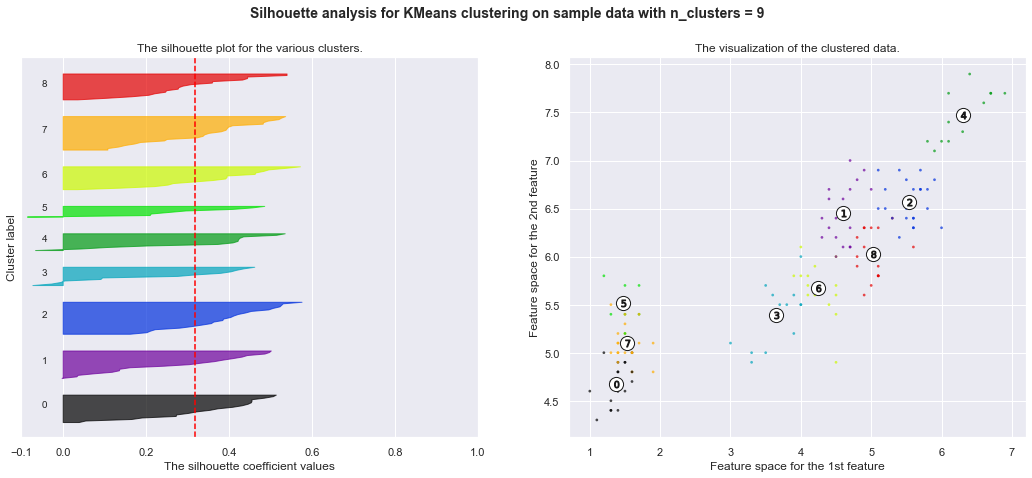

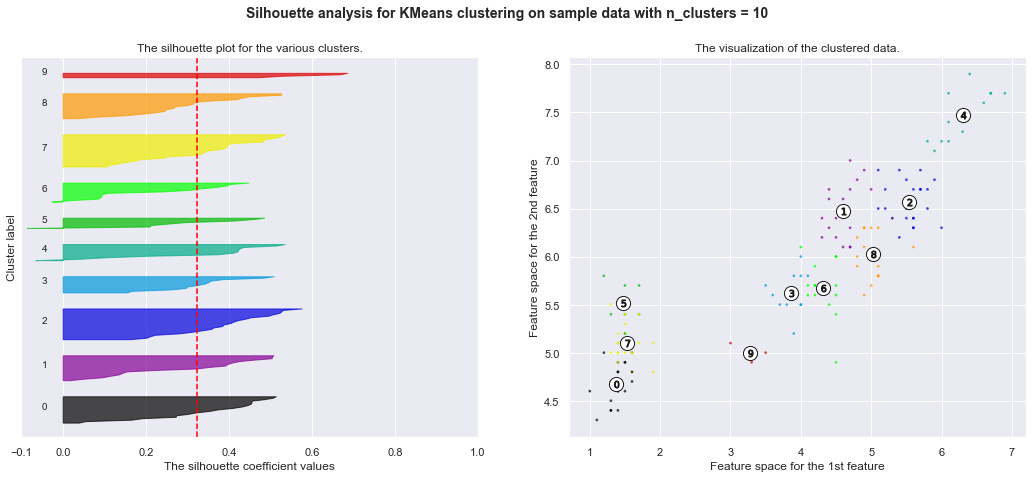

In [325]:
seed = 0
dict_silhouette_avg = dict()
range_n_clusters = range(2,7)

for n_clusters in range_n_clusters:
    
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])

    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 6])


    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    
    dict_silhouette_avg[n_clusters] = silhouette_avg


    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):

        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)


        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

     
        y_lower = y_upper + 10 

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")


    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([]) 
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 1], X[:, 0], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    
    centers = clusterer.cluster_centers_
   
    ax2.scatter(centers[:,1], centers[:,0], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[1], c[0], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()



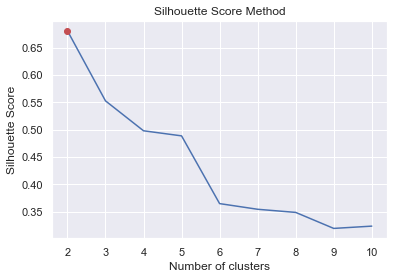

In [326]:
silhouette_df = pd.Series(dict_silhouette_avg)
ax = silhouette_df.plot(title = 'Silhouette Score Method')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Silhouette Score')
plt.plot(2,silhouette_df[2],'ro')



## 클러스터 수 정하기
From the figure above, we can see that when the number of cluster is 2, average silhouette score is maximized. However, the elbow method shows the number of cluster 3 is more proper.

Thus we choose the number of cluster to be 3

-------------------------------

위의 그림에서 클러스터 수가 2일 때 평균 실루엣 점수가 극대화되는 것을 알 수 있다. 그러나 팔꿈치 방법은 군집 3의 수가 더 적절하다는 것을 보여준다.

따라서 우리는 군집 수를 3으로 선택한다.

## Hierarchical clustering

Hierarchical clustering works by first putting each data point in their own cluster and then merging clusters based on some rule, until there are only the wanted number of clusters remaining. For this to work, there needs to be a distance measure between the data points. With this distance measure `d`, we can define another distance measure between the **clusters** U and V using one of the following methods (*linkages*):

- 계층적 클러스터링은 먼저 각 데이터 지점을 자체 클러스터에 넣은 다음 원하는 클러스터 수만 남아 있을 때까지 일부 규칙에 따라 클러스터를 병합하는 방식으로 작동한다. 이를 위해서는 데이터 포인트 간 거리 측정이 필요하다. 이 거리 측정 d를 사용하면 다음 방법(링크) 중 하나를 사용하여 클러스터 U와 V 사이의 다른 거리 측정을 정의할 수 있다.

* `single`: $d(U, V) := \min_{u \in U, v \in V} d(u,v)$ 
* `complete`: $d(U, V) := \max_{u \in U, v \in V} d(u,v)$
* `average`: $d(U, V) := \sum_{u \in U, v \in V} \frac{d(u,v)}{|U||V|}$
* `ward`: tries to minimize the variance in each cluster

- Single : min distance u,v사이에 가장 짧은 거리에있는걸 하나의 클래스에 넣는다
- complete : maximum
- average : 2개 포인트의 평균

유클리디안, 맨하튼 등등 여러가지 distance 방법이 있음

### iris 데이터의 dendogram 
### method 바꾸면서 실행 가능 -> 분석이 달라진다 그림도 달라진다
### 3개의 군집을 확인할 수 있다.
x axis : attribute 
instance number 

 어두운 부분은 1.5보다 작음
 
세개로 나누고 싶으면 큰 줄기에서 나누면 된다.

['setosa' 'versicolor' 'virginica']


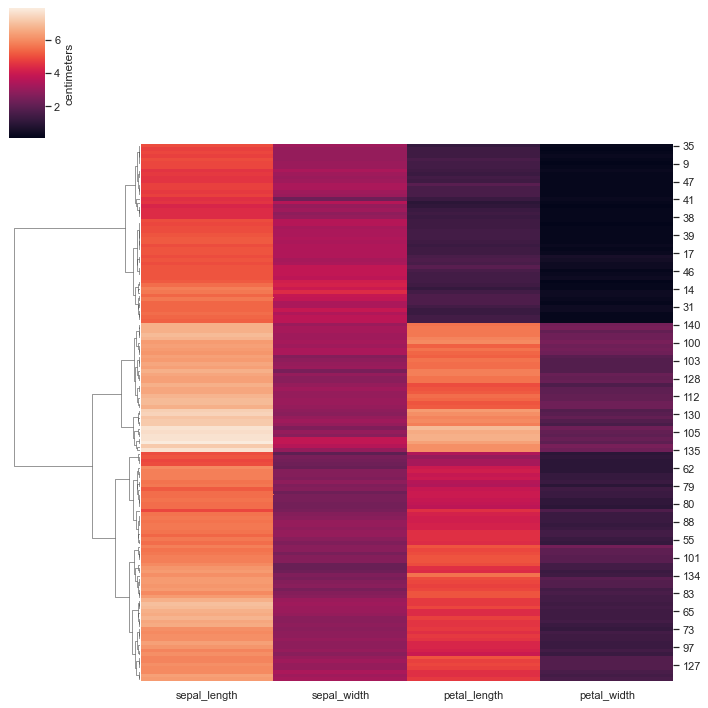

In [327]:
import seaborn as sns; sns.set(color_codes=True)
iris = sns.load_dataset("iris")
species = iris.pop("species")   # Remove the species column / 범주형 데이터를 제거함
print(species.unique())         # The samples seems to be from these three species
sns.clustermap(iris, method="ward", col_cluster=False, cbar_kws={'label': 'centimeters'}); # Cluster only the rows
#plt.colorbar().ax.set_title('This is a title')
#plt.gca().images[-1].colorbar.ax.set_title("title")

### K-mean 단점: 군집이 볼록한 모양이 아닐 때 어려움.
The k-means algorithm can have difficulties when the clusters are not convex shapes: AHC

In [328]:
from sklearn.datasets import make_moons #another randomized dataset to make moon
X,y = make_moons(200, noise=0.05, random_state=0) # distance 가 적다 = noise작게 설정 

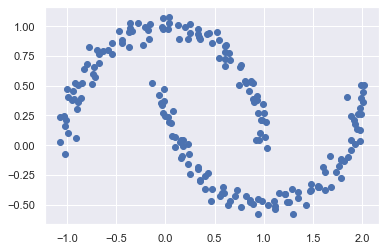

In [329]:
plt.scatter(X[:,0], X[:,1]); # 0은 첫번째 열 , 1은 두번째 컬럼 , 200개의 데이터가 찍혀있음

# 두개의 그룹이 있다 위 반달, 아래 반달

### 대각선으로 나눠진다 왜? kmean은 우리가 centroid를 결정시키고 싶다 centroid : center point
### 우리는 center point는 없다
### 너가 center poiing를 얻고싶다하면 이렇게 결과가 나온다
### kmean이용하면 안된다

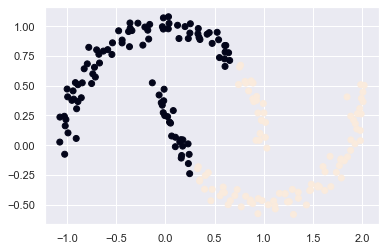

In [330]:
model=KMeans(2)
model.fit(X)
plt.scatter(X[:,0], X[:,1], c=model.labels_);

### DBSCAN : 밀도기반 클러스터링
- 다른 클러스터링과 같이 파라미터를 정의해야함
- EPS : RADIAS ( 반지름 ) 원 그려주면 그 안에 있는 데이터들이 한 그룹
- MINPTS : 5
- 클러스터 수를 지정할 필요가 없고,Raidas만 찾으면 된다

만약에 5개가 RADIAS에 있다면 한 그룹으로 만들 수 있다.

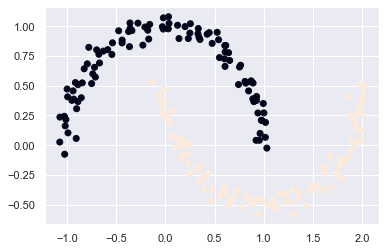

In [331]:
from sklearn.cluster import DBSCAN  # 원 주변에 0.3으로
model = DBSCAN(eps=0.3)
model.fit(X)
plt.scatter(X[:,0], X[:,1], c=model.labels_);

## Clustering digits

In [332]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

# 64개의 열이있다

(1797, 64)

In [333]:
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

# 첫번째 줄은 0을 나타내고 두번째줄은 1

# 0
# 1
# ..
# 9
# 10개

(10, 64)

gray scale 흰색은 0 검정색은 1 로 64개를 채워준다 
1과 8은 구분하기 어렵다.

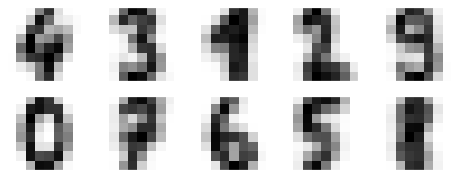

In [334]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8) # 8 x 8 픽셀에 숫자를 그린다
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [335]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

In [336]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)
# 클러스터 결과와 실제 값과 비교해서 정확도 

0.7952142459654981

### 실제로는 9개 인데 5라고 결과를 낸 6개의 데이터가 있다

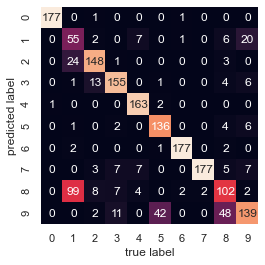

In [337]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

#  clustering(클러스터링개인공부) - K-mean

In [34]:
from sklearn.cluster import KMeans

In [81]:
missing_values = ["?"]
im= pd.read_csv('C:/Users/82106/Desktop/2020-2학기/데싸/data_science/imports-85-01.csv', na_values = missing_values)

In [82]:
mean1 = im['price'].mean()
im['price'].fillna(mean1, inplace=True)
mean2 = im['horsepower'].mean()
im['horsepower'].fillna(mean2, inplace=True)

In [83]:
im.head()

,make,fuel-type,length,width,height,horsepower,city-mpg,highway-mpg,price
0,alfa-romero,gas,168.8,64.1,48.8,111.0,21,27,13495.000000
1,alfa-romero,gas,168.8,64.1,48.8,111.0,21,27,16500.000000
2,alfa-romero,gas,171.2,65.5,52.4,154.0,19,26,13186.849246
3,audi,gas,176.6,66.2,54.3,102.0,24,30,13186.849246
4,audi,gas,176.6,66.4,54.3,115.0,18,22,17450.000000


In [84]:
feature_cols = im.columns[2:8]
X = im[feature_cols]

In [85]:
X=X.values

In [86]:

est = KMeans(n_clusters=2, init='random') 
est.fit(X) 
y_kmeans = est.predict(X) 

In [87]:
est.fit_predict(X)
inertia = est.inertia_
inertia

142259.6261036431

C:\Users\82106\anaconda3\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Text(0, 0.5, '[168.8  64.1  48.8 111.   21.   27. ]')

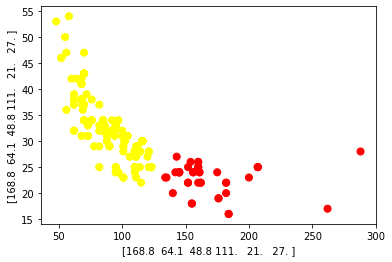

In [88]:
colors = np.array(['red','yellow']) 
plt.figure()
plt.scatter(X[:, 3], X[:,5], c=colors[y_kmeans], s=50) 
plt.xlabel(X[0])
plt.ylabel(X[1])

In [89]:
centers = est.cluster_centers_ # get the cluster center
centers




array([[171.6803681 ,  65.39325153,  53.88588957,  87.7516093 ,
         27.22699387,  32.79754601],
       [183.24285714,  67.9047619 ,  53.1       , 168.30952381,
         17.42857143,  22.80952381]])

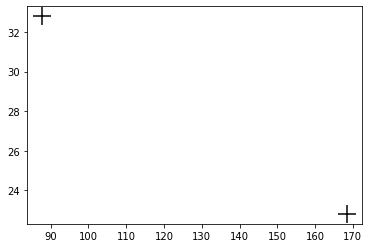

In [90]:
plt.scatter(centers[:, 3], centers[:, 5], c='k', marker='+', s=300)

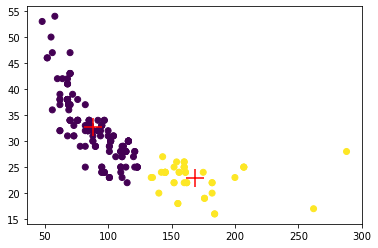

In [91]:
plt.scatter(X[:,3],X[:,5], c=est.labels_);
plt.scatter(est.cluster_centers_[:,3], est.cluster_centers_[:,5], c='red', marker='+', s=300); #

# PCA시작 (principal component analysis)

|-|continuous|categorical|
|---|---|---|
|**supervised**|regression|classification|
|**unsupervised**|**dimension reduction**|clustering|

In [92]:
im.head()

,make,fuel-type,length,width,height,horsepower,city-mpg,highway-mpg,price
0,alfa-romero,gas,168.8,64.1,48.8,111.0,21,27,13495.000000
1,alfa-romero,gas,168.8,64.1,48.8,111.0,21,27,16500.000000
2,alfa-romero,gas,171.2,65.5,52.4,154.0,19,26,13186.849246
3,audi,gas,176.6,66.2,54.3,102.0,24,30,13186.849246
4,audi,gas,176.6,66.4,54.3,115.0,18,22,17450.000000


In [94]:
nums = im['price']
low_range =(nums < 13186)
im.loc[low_range, 'price'] = 'low quality'
high_range =(nums >=13186)
im.loc[high_range, 'price'] = 'high quality'


In [95]:
im.head()

,make,fuel-type,length,width,height,horsepower,city-mpg,highway-mpg,price
0,alfa-romero,gas,168.8,64.1,48.8,111.0,21,27,high quality
1,alfa-romero,gas,168.8,64.1,48.8,111.0,21,27,high quality
2,alfa-romero,gas,171.2,65.5,52.4,154.0,19,26,high quality
3,audi,gas,176.6,66.2,54.3,102.0,24,30,high quality
4,audi,gas,176.6,66.4,54.3,115.0,18,22,high quality


In [96]:
im.columns

Index(['make', 'fuel-type', 'length', 'width', 'height', 'horsepower',
       'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

In [97]:
from sklearn.preprocessing import StandardScaler
features = [ 'length', 'width', 'height', 'horsepower',
       'city-mpg', 'highway-mpg']

# Separating out the features
x = im.loc[:, features].values
# Separating out the target
y = im.loc[:,['price']].values


In [98]:
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [99]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [100]:
principalDf

,principal component 1,principal component 2
0,0.174263,2.218653
1,0.174263,2.218653
2,-1.040333,1.304874
3,-0.292058,-0.247109
4,-1.439130,0.233228
...,...,...
200,-1.666248,-1.005102
201,-2.620721,-0.392700
202,-2.572159,-0.549598
203,-1.437321,-1.152464


In [101]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)
finalDf

,index,price
0,0,high quality
1,1,high quality
2,2,high quality
3,3,high quality
4,4,high quality
...,...,...
200,200,high quality
201,201,high quality
202,202,high quality
203,203,high quality


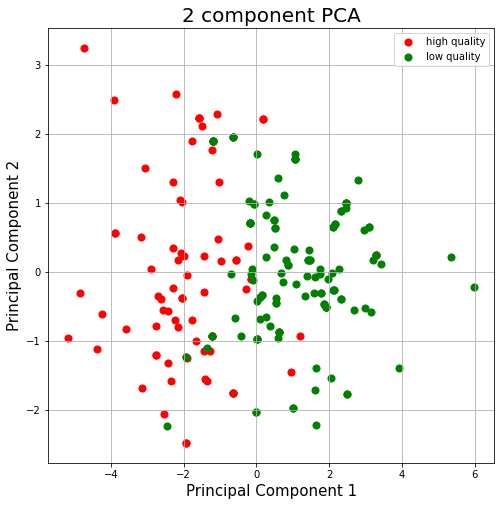

In [118]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['high quality', 'low quality']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['price'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()



In [119]:
#The two components contain 0.27+ 0.23 = 0.50 (50%) of the information.
pca.explained_variance_ratio_

array([0.92174673, 0.0628608 ])

In [120]:
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (205, 2)
transformed shape: (205, 2)


In [121]:
finalDf

,principal component 1,principal component 2,price
0,0.174263,2.218653,high quality
1,0.174263,2.218653,high quality
2,-1.040333,1.304874,high quality
3,-0.292058,-0.247109,high quality
4,-1.439130,0.233228,high quality
...,...,...,...
200,-1.666248,-1.005102,high quality
201,-2.620721,-0.392700,high quality
202,-2.572159,-0.549598,high quality
203,-1.437321,-1.152464,high quality


In [122]:

feature_cols = ['principal component 1', 'principal component 2']

# define X and y
X = finalDf[feature_cols]
y= finalDf['price']


In [123]:
X=X.values

In [124]:
from sklearn.cluster import KMeans
est = KMeans(n_clusters=2, init='random') 
est.fit(X) 
y_kmeans = est.predict(X) 

In [125]:
est.fit_predict(X)
inertia = est.inertia_
inertia

532.0697950735583

C:\Users\82106\anaconda3\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Text(0, 0.5, '[0.17426329 2.21865345]')

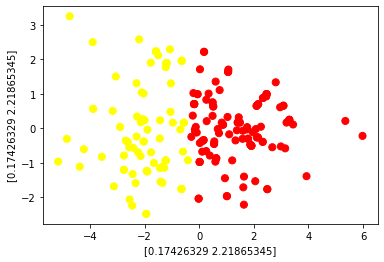

In [126]:
colors = np.array(['red','yellow','green']) 
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=colors[y_kmeans], s=50) 
plt.xlabel(X[0])
plt.ylabel(X[1])

## X변수와 Y변수사이에 선형관계 -> X값과 Y값의 관계찾기

In [6]:
print(pca.components_)

[[-0.46551125 -0.20831427 -0.58461456 -0.63097564]
 [ 0.50069297 -0.4712601  -0.62664449  0.36679306]]


In [117]:
print(pca.explained_variance_)

[1672.76029436  114.07802669]


### variance / 0.92 + 0.06 = 0.98 = 98% 

In [116]:
#The two components contain 0.92 + 0.06 = 0.98 (98%) of the information.
print(pca.explained_variance_ratio_)

[0.92174673 0.0628608 ]


### 강의자료 PCA그림 해석:
이러한 벡터는 데이터의 주요 축을 나타내며, 벡터의 길이는 그 축이 데이터의 분포를 설명함에 있어서 얼마나 "중요"한지 나타내는 것이다. 더 정확히 말하면, 그것은 그 축에 투영되었을 때의 데이터 분산의 척도인 것이다. 각 데이터 점을 주 축에 투영하는 것은 데이터의 "주요 구성요소"이다.

## PCA 적용

In [9]:
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 4)
transformed shape: (200, 2)


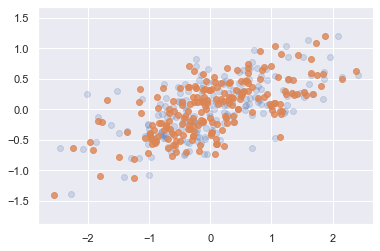

In [10]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

#### PCA in Iris data

In [11]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

In [12]:
from sklearn.preprocessing import StandardScaler
features = ['sepal length', 'sepal width', 'petal length', 'petal width']

# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['target']].values


## StandardScaler()  각 feature의 평균을 0 , 분산을 1

In [13]:
# Standardizing the features
x = StandardScaler().fit_transform(x)

## PCA(n_components=2) ,2개만 선택

In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [15]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)
finalDf

,principal component 1,principal component 2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa
...,...,...,...
145,1.870522,0.382822,Iris-virginica
146,1.558492,-0.905314,Iris-virginica
147,1.520845,0.266795,Iris-virginica
148,1.376391,1.016362,Iris-virginica


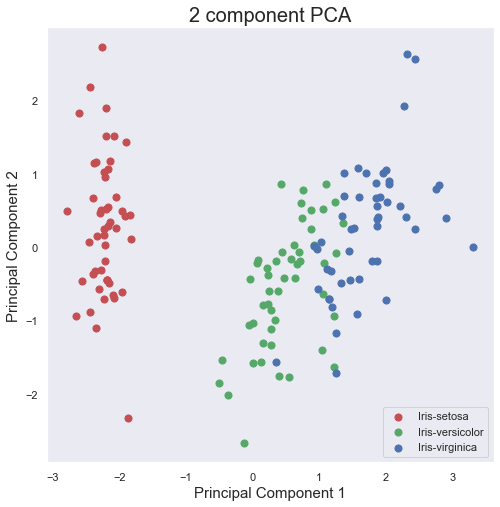

In [16]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

### 첫번째 주성분의 분산은 72.77%, 두번째 주성분의 분산은 23.03% 합하면 95.80%이다. => PCA는 고차원데이터에서 더 유용하다.

In [17]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

In [18]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [19]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


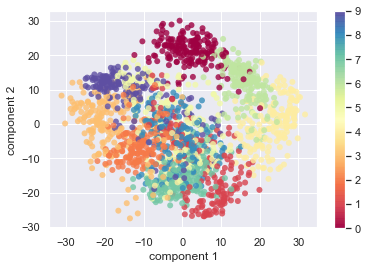

In [20]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.8,
            cmap=plt.cm.get_cmap('Spectral'))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

# component(성분 수 선택) 
- 10 까지는 약 분산의 75%를 차지
- 50 부터는 100% 가까운 분산을 설명
- 2차원 축소는 많은 정보를 손실하며, 분산의 90%를 유지하기 위해서는 약 20개의 component가 필요.


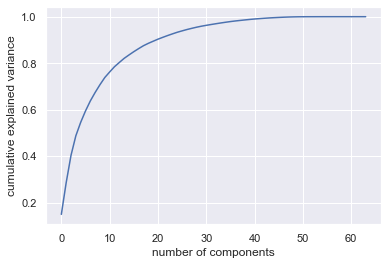

In [21]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

# Association Rule

In [89]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import fpmax
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

In [90]:
df = pd.read_csv('C:/Users/82106/Desktop/2020-2학기/데싸/RawTransactionDay1.csv')

In [91]:
df.head()

,No,Item
0,1,Wine
1,1,Chips
2,1,Bread
3,1,Butter
4,1,Milk


###  association rule을 사용하기 위해서는, 데이터타입을 string으로 수정해야한다.

In [92]:
df['No'] = df['No'].astype('str')
df['Item'] = df['Item'].astype('str')

In [93]:
df.dtypes

No      object
Item    object
dtype: object

### basket analysis를 하기위해, matrix 형태의 데이터가 필요하다.

In [94]:
basket = (df.groupby(['No', 'Item'])['Item']
         .count().unstack().reset_index().fillna(0)
         .set_index('No'))

In [95]:
basket.head()

Item,Apple,Bread,Butter,Chips,Milk,Wine
No,,,,,,
1,1.0,1.0,1.0,1.0,1.0,1.0
10,0.0,1.0,1.0,0.0,1.0,1.0
11,1.0,1.0,1.0,1.0,0.0,0.0
12,1.0,0.0,1.0,0.0,1.0,1.0
13,0.0,1.0,1.0,1.0,1.0,1.0


### 실수를 정수로

In [96]:
def encode_unit(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

In [97]:
basket_sets = basket.applymap(encode_unit)
basket_sets.head()

Item,Apple,Bread,Butter,Chips,Milk,Wine
No,,,,,,
1,1,1,1,1,1,1
10,0,1,1,0,1,1
11,1,1,1,1,0,0
12,1,0,1,0,1,1
13,0,1,1,1,1,1


### MIn_support  

In [98]:
frequent_itemsets = apriori(basket_sets, min_support = 0.1, use_colnames = True)

In [99]:
frequent_itemsets.shape

(63, 2)

In [100]:
frequent_itemsets.head()

,support,itemsets
0,0.681818,(Apple)
1,0.727273,(Bread)
2,0.681818,(Butter)
3,0.636364,(Chips)
4,0.772727,(Milk)


### Min_cinfidence = Min_thershold

In [101]:
rules = association_rules(frequent_itemsets, metric='lift', min_threshold = 1)
rules.columns

Index(['antecedents', 'consequents', 'antecedent support',
       'consequent support', 'support', 'confidence', 'lift', 'leverage',
       'conviction'],
      dtype='object')

## suport에 따라 분류

In [104]:
# generated rules are sorted by some criterias/attributes
rules.sort_values(['support'], axis=0, ascending=False, inplace=True)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
19,(Wine),(Milk),0.727273,0.772727,0.636364,0.875000,1.132353,0.074380,1.818182
18,(Milk),(Wine),0.772727,0.727273,0.636364,0.823529,1.132353,0.074380,1.545455
11,(Bread),(Milk),0.727273,0.772727,0.590909,0.812500,1.051471,0.028926,1.212121
15,(Butter),(Milk),0.681818,0.772727,0.590909,0.866667,1.121569,0.064050,1.704545
14,(Milk),(Butter),0.772727,0.681818,0.590909,0.764706,1.121569,0.064050,1.352273


In summary, the total generated rules could be retrieved with .shape

In [105]:
print('total generated rules:', rules.shape)

total generated rules: (496, 9)


### Support 기준 상위 10개 

In [106]:
rules.nlargest(10,['support'])

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
19,(Wine),(Milk),0.727273,0.772727,0.636364,0.875000,1.132353,0.074380,1.818182
18,(Milk),(Wine),0.772727,0.727273,0.636364,0.823529,1.132353,0.074380,1.545455
11,(Bread),(Milk),0.727273,0.772727,0.590909,0.812500,1.051471,0.028926,1.212121
15,(Butter),(Milk),0.681818,0.772727,0.590909,0.866667,1.121569,0.064050,1.704545
14,(Milk),(Butter),0.772727,0.681818,0.590909,0.764706,1.121569,0.064050,1.352273
13,(Wine),(Bread),0.727273,0.727273,0.590909,0.812500,1.117188,0.061983,1.454545
12,(Bread),(Wine),0.727273,0.727273,0.590909,0.812500,1.117188,0.061983,1.454545
8,(Bread),(Butter),0.727273,0.681818,0.590909,0.812500,1.191667,0.095041,1.696970
9,(Butter),(Bread),0.681818,0.727273,0.590909,0.866667,1.191667,0.095041,2.045455
10,(Milk),(Bread),0.772727,0.727273,0.590909,0.764706,1.051471,0.028926,1.159091


## Antecedents = 선행요소

In [107]:
rules[rules['antecedents'] == {'Milk'}]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
18,(Milk),(Wine),0.772727,0.727273,0.636364,0.823529,1.132353,0.074380,1.545455
14,(Milk),(Butter),0.772727,0.681818,0.590909,0.764706,1.121569,0.064050,1.352273
10,(Milk),(Bread),0.772727,0.727273,0.590909,0.764706,1.051471,0.028926,1.159091
75,(Milk),"(Bread, Butter)",0.772727,0.590909,0.500000,0.647059,1.095023,0.043388,1.159091
93,(Milk),"(Bread, Wine)",0.772727,0.590909,0.500000,0.647059,1.095023,0.043388,1.159091
103,(Milk),"(Wine, Butter)",0.772727,0.500000,0.454545,0.588235,1.176471,0.068182,1.214286
260,(Milk),"(Bread, Butter, Wine)",0.772727,0.454545,0.409091,0.529412,1.164706,0.057851,1.159091
66,(Milk),"(Wine, Apple)",0.772727,0.500000,0.409091,0.529412,1.058824,0.022727,1.062500
51,(Milk),"(Butter, Apple)",0.772727,0.500000,0.409091,0.529412,1.058824,0.022727,1.062500
182,(Milk),"(Bread, Wine, Apple)",0.772727,0.454545,0.363636,0.470588,1.035294,0.012397,1.030303


## consequents = 결과

In [108]:
rules[rules['consequents'] == {'Wine'}]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
18,(Milk),(Wine),0.772727,0.727273,0.636364,0.823529,1.132353,0.074380,1.545455
12,(Bread),(Wine),0.727273,0.727273,0.590909,0.812500,1.117188,0.061983,1.454545
17,(Butter),(Wine),0.681818,0.727273,0.500000,0.733333,1.008333,0.004132,1.022727
90,"(Milk, Bread)",(Wine),0.590909,0.727273,0.500000,0.846154,1.163462,0.070248,1.772727
7,(Apple),(Wine),0.681818,0.727273,0.500000,0.733333,1.008333,0.004132,1.022727
37,"(Bread, Apple)",(Wine),0.545455,0.727273,0.454545,0.833333,1.145833,0.057851,1.636364
101,"(Milk, Butter)",(Wine),0.590909,0.727273,0.454545,0.769231,1.057692,0.024793,1.181818
79,"(Bread, Butter)",(Wine),0.590909,0.727273,0.454545,0.769231,1.057692,0.024793,1.181818
251,"(Milk, Bread, Butter)",(Wine),0.500000,0.727273,0.409091,0.818182,1.125000,0.045455,1.500000
64,"(Milk, Apple)",(Wine),0.500000,0.727273,0.409091,0.818182,1.125000,0.045455,1.500000


## min_sup이 0.6이고 lift가 1보다 큰 규칙
### min_sup , lift 조건

In [110]:
rules[(rules['support'] >= 0.6) & (rules['lift'] >= 1)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
19,(Wine),(Milk),0.727273,0.772727,0.636364,0.875000,1.132353,0.07438,1.818182
18,(Milk),(Wine),0.772727,0.727273,0.636364,0.823529,1.132353,0.07438,1.545455


Seeing the number of items in one frequent itemsets
- frequent= 1 인 itemset 보기 조건

In [111]:
#frequent_itemsets = apriori(df, min_support=0.6, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.681818,(Apple),1
1,0.727273,(Bread),1
2,0.681818,(Butter),1
3,0.636364,(Chips),1
4,0.772727,(Milk),1
...,...,...,...
58,0.272727,"(Bread, Wine, Apple, Milk, Butter)",5
59,0.227273,"(Bread, Wine, Apple, Milk, Chips)",5
60,0.181818,"(Wine, Apple, Milk, Chips, Butter)",5
61,0.227273,"(Bread, Wine, Milk, Chips, Butter)",5


# Association rules with multiple description of items 
- 여러개 항목에 대한 연관규칙분석

## csv파일 불러올때, 컬럼명이 지정안되있을때
### csv파일에서 header=None 로 지정 , 번호로 컬럼명 재부여
### 컬럼이 따로 지정되있는 파일과 함께 합칠 때 
### 컬럼

In [116]:
dataAdult = pd.read_csv('C:/Users/82106/Desktop/2020-2학기/데싸/data/adults.csv', header = None)
dataAdult.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [121]:
col_names = pd.read_csv('C:/Users/82106/Desktop/2020-2학기/데싸/data/col_name.csv', header = None)
col_names

,0
0,age
1,workclass
2,fnlwgt
3,education
4,education_num
5,marital_status
6,occupation
7,relationship
8,race
9,sex


### 컬럼 list(리스트형태) 로 불러오기.

In [124]:
#col_names.values.tolist()
col_names.stack().tolist()

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education_num',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital_gain',
 'capital_loss',
 'hours_per_week',
 'native_country',
 'salary']

In [131]:
l=['age','workclass','fnlwgt','education','education_num','marital_status','occupation','relationship','race','sex',
 'capital_gain',
 'capital_loss',
 'hours_per_week',
 'native_country',
 'salary']

In [132]:
l

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education_num',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital_gain',
 'capital_loss',
 'hours_per_week',
 'native_country',
 'salary']

## 새로운 컬럼 부여
### list에 있던 값으로 컬럼 부여

In [133]:
dataAdult.columns = col_names.stack().tolist()
dataAdult.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Association 같은 경우 범주형(string)에만 분석에 사용할 수 있다. 수치형(numerical)을 범주형 데이터로 전환하면 알고리즘의 시간 복잡성이 증가한다.

In [135]:
dataAdultStr = dataAdult[['workclass', 'education', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'salary']]
dataAdultStr.head()

,workclass,education,occupation,relationship,race,sex,native_country,salary
0,State-gov,Bachelors,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [137]:
nAdult = dataAdultStr.values.tolist()
nAdult

[[' State-gov',
  ' Bachelors',
  ' Adm-clerical',
  ' Not-in-family',
  ' White',
  ' Male',
  ' United-States',
  ' <=50K'],
 [' Self-emp-not-inc',
  ' Bachelors',
  ' Exec-managerial',
  ' Husband',
  ' White',
  ' Male',
  ' United-States',
  ' <=50K'],
 [' Private',
  ' HS-grad',
  ' Handlers-cleaners',
  ' Not-in-family',
  ' White',
  ' Male',
  ' United-States',
  ' <=50K'],
 [' Private',
  ' 11th',
  ' Handlers-cleaners',
  ' Husband',
  ' Black',
  ' Male',
  ' United-States',
  ' <=50K'],
 [' Private',
  ' Bachelors',
  ' Prof-specialty',
  ' Wife',
  ' Black',
  ' Female',
  ' Cuba',
  ' <=50K'],
 [' Private',
  ' Masters',
  ' Exec-managerial',
  ' Wife',
  ' White',
  ' Female',
  ' United-States',
  ' <=50K'],
 [' Private',
  ' 9th',
  ' Other-service',
  ' Not-in-family',
  ' Black',
  ' Female',
  ' Jamaica',
  ' <=50K'],
 [' Self-emp-not-inc',
  ' HS-grad',
  ' Exec-managerial',
  ' Husband',
  ' White',
  ' Male',
  ' United-States',
  ' >50K'],
 [' Private',
  ' Mas

### list(리스트)목록에서 TransactionEncoder에 의해 String을 이진수로 인코딩
### apriory 알고리즘은 boolean 또는 int(정수) 데이터를 분석할 수 있다.

In [138]:
te = TransactionEncoder()
te_ary = te.fit(nAdult).transform(nAdult)
te_ary.astype("int")

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [139]:
df = pd.DataFrame(te_ary, columns=te.columns_)
frequent_itemsets = apriori(df, min_support=0.4, use_colnames=True)

frequent_itemsets

,support,itemsets
0,0.760718,( <=50K)
1,0.403669,( Husband)
2,0.668482,( Male)
3,0.694198,( Private)
4,0.897424,( United-States)
5,0.855043,( White)
6,0.465419,"( Male, <=50K)"
7,0.542955,"( <=50K, Private)"
8,0.678473,"( United-States, <=50K)"
9,0.637873,"( <=50K, White)"


## metric='confidence'

In [141]:
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold = 0.6)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,( Male),( <=50K),0.668482,0.760718,0.465419,0.696233,0.915231,-0.043107,0.787714
1,( <=50K),( Male),0.760718,0.668482,0.465419,0.611815,0.915231,-0.043107,0.854021
2,( <=50K),( Private),0.760718,0.694198,0.542955,0.713740,1.028151,0.014866,1.068267
3,( Private),( <=50K),0.694198,0.760718,0.542955,0.782133,1.028151,0.014866,1.098293
4,( United-States),( <=50K),0.897424,0.760718,0.678473,0.756023,0.993828,-0.004214,0.980755


## support에 대해 크기순으로 

In [142]:
# generated rules are sorted by some criterias/attributes
rules.sort_values(['support'], axis=0, ascending=False, inplace=True)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
21,( White),( United-States),0.855043,0.897424,0.788113,0.921723,1.027076,0.020776,1.310420
20,( United-States),( White),0.897424,0.855043,0.788113,0.878194,1.027076,0.020776,1.190066
4,( United-States),( <=50K),0.897424,0.760718,0.678473,0.756023,0.993828,-0.004214,0.980755
5,( <=50K),( United-States),0.760718,0.897424,0.678473,0.891885,0.993828,-0.004214,0.948767
6,( <=50K),( White),0.760718,0.855043,0.637873,0.838514,0.980669,-0.012574,0.897648


## support에 대해 크기순으로 

In [144]:
rules.nlargest(5,['support'])

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
21,( White),( United-States),0.855043,0.897424,0.788113,0.921723,1.027076,0.020776,1.310420
20,( United-States),( White),0.897424,0.855043,0.788113,0.878194,1.027076,0.020776,1.190066
4,( United-States),( <=50K),0.897424,0.760718,0.678473,0.756023,0.993828,-0.004214,0.980755
5,( <=50K),( United-States),0.760718,0.897424,0.678473,0.891885,0.993828,-0.004214,0.948767
6,( <=50K),( White),0.760718,0.855043,0.637873,0.838514,0.980669,-0.012574,0.897648


In [145]:
rules[rules['antecedents'] == {' White'}]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
21,( White),( United-States),0.855043,0.897424,0.788113,0.921723,1.027076,0.020776,1.310420
7,( White),( <=50K),0.855043,0.760718,0.637873,0.746013,0.980669,-0.012574,0.942103
18,( White),( Private),0.855043,0.694198,0.594243,0.694986,1.001135,0.000674,1.002584
15,( White),( Male),0.855043,0.668482,0.588326,0.688066,1.029296,0.016745,1.062781
43,( White),"( United-States, <=50K)",0.855043,0.678473,0.583535,0.682463,1.005879,0.003411,1.012563
63,( White),"( United-States, Private)",0.855043,0.617194,0.543385,0.635506,1.029669,0.015657,1.050239
57,( White),"( United-States, Male)",0.855043,0.598317,0.541542,0.633351,1.058554,0.029955,1.095551


## 조건검색

In [146]:
rules[(rules['support'] >= 0.6) & (rules['lift'] >= 1)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
21,( White),( United-States),0.855043,0.897424,0.788113,0.921723,1.027076,0.020776,1.310420
20,( United-States),( White),0.897424,0.855043,0.788113,0.878194,1.027076,0.020776,1.190066


## item의 frequent 수 보기

In [148]:
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.760718,( <=50K),1
1,0.403669,( Husband),1
2,0.668482,( Male),1
3,0.694198,( Private),1
4,0.897424,( United-States),1
5,0.855043,( White),1
6,0.465419,"( Male, <=50K)",2
7,0.542955,"( <=50K, Private)",2
8,0.678473,"( United-States, <=50K)",2
9,0.637873,"( <=50K, White)",2


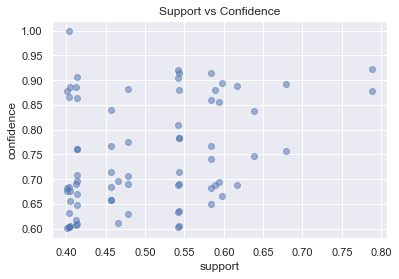

In [149]:
import matplotlib.pyplot as plt
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

# Cross Validation (유효성검증)
- CV는 overfitting , underfitting  을 해결하기위해 사용

In [150]:
#import 
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

## 컬럼부여

In [151]:
# Load the Diabetes dataset
columns = "age sex bmi map tc ldl hdl tch ltg glu".split() # Declare the columns names
diabetes = datasets.load_diabetes() # Call the diabetes dataset from sklearn
df = pd.DataFrame(diabetes.data, columns=columns) # load the dataset as a pandas data frame
y = diabetes.target # define the target variable (dependent variable) as y

In [152]:
df.head()

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [155]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
#(353, 10) (353,)
#(89, 10) (89,)

(353, 10) (353,)
(89, 10) (89,)


In [160]:
# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predictions')

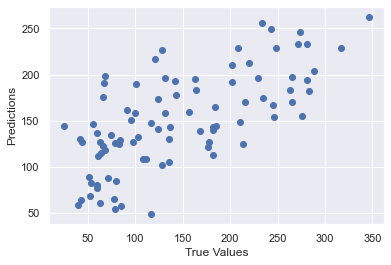

In [161]:
## The line / model
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [162]:
print("Score: ", model.score(X_test, y_test))

Score:  0.46268587719438514


# K-Fold
- k개로 쪼개서 k-1개를 traning set , 한개를 validation set으로 fold를 바꿔가며 진행한다.

In [163]:
import numpy as np
from sklearn.model_selection import KFold # import KFold
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]]) # create an array
y = np.array([1, 2, 3, 4]) # Create another array
kf = KFold(n_splits=2) # Define the split - into 2 folds 
kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator
print(kf) 
KFold(n_splits=2, random_state=None, shuffle=False)

KFold(n_splits=2, random_state=None, shuffle=False)


KFold(n_splits=2, random_state=None, shuffle=False)

In [164]:
for train_index, test_index in kf.split(X):
 print("TRAIN:", train_index, "TEST:", test_index)
 X_train, X_test = X[train_index], X[test_index]
 y_train, y_test = y[train_index], y[test_index]


TRAIN: [2 3] TEST: [0 1]
TRAIN: [0 1] TEST: [2 3]


# Leave-One-Out Cross Validation (LOOCV)
- n개로 data set을 쪼개서, 1개를 validation set으로 하고, 나머지를 training set으로 설정하여 진행

In [165]:
from sklearn.model_selection import LeaveOneOut 
X = np.array([[1, 2], [3, 4]])
y = np.array([1, 2])
loo = LeaveOneOut()
loo.get_n_splits(X)


for train_index, test_index in loo.split(X):
   print("TRAIN:", train_index, "TEST:", test_index)
   X_train, X_test = X[train_index], X[test_index]
   y_train, y_test = y[train_index], y[test_index]
   print(X_train, X_test, y_train, y_test)

TRAIN: [1] TEST: [0]
[[3 4]] [[1 2]] [2] [1]
TRAIN: [0] TEST: [1]
[[1 2]] [[3 4]] [1] [2]


In [168]:
# Necessary imports: 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
# data set 다시 불러오기. ( LOOCV하기위해)
columns = "age sex bmi map tc ldl hdl tch ltg glu".split() # Declare the columns names
diabetes = datasets.load_diabetes() # Call the diabetes dataset from sklearn
df = pd.DataFrame(diabetes.data, columns=columns) # load the dataset as a pandas data frame
y = diabetes.target # define the target variable (dependent variable) as y

## 순서대로 k-fold를 진행했을때의 유효정도
### 원래 모델(0.455)의 score를 0.569로 향상시킴.

In [167]:
# Perform 6-fold cross validation
scores = cross_val_score(model, df, y, cv=6)
print("Cross-validated scores:", scores)

Cross-validated scores: [0.4554861  0.46138572 0.40094084 0.55220736 0.43942775 0.56923406]


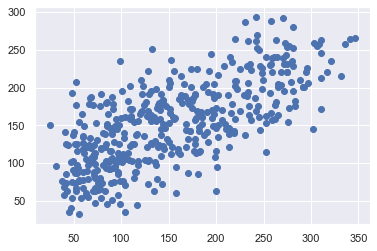

In [173]:
# Make cross validated predictions
predictions = cross_val_predict(model, df, y, cv=6)
plt.scatter(y, predictions)

## R값 확인, R값은 독립 변수들 사이에서 예측가능한 종속 변수의 분산 비율을 나타낸다. 정확도를 의미하기도함.

In [174]:
accuracy = metrics.r2_score(y, predictions)
print("Cross-Predicted Accuracy:", accuracy)

Cross-Predicted Accuracy: 0.4908065838640775


## K-fold 예시(Iris)

In [175]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import datasets
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

iris = datasets.load_iris()
X = iris.data
y = iris.target

scorelist = []
# fit a model
clf = DecisionTreeClassifier()

kf = KFold(n_splits=5)

for train_index, test_index in kf.split(range(len(X))):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    scorelist.append(score)
    print(score)

TRAIN: [ 30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47
  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65
  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119
 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149] TEST: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
1.0
TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  60  61  62  63  64  65
  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119
 120 121 122 123 124 125 126 1

In [177]:
scorelist
import numpy as np
sl = np.array(scorelist)

In [178]:
print(np.mean(sl))
print(np.median(sl))
print(np.min(sl))
print(np.max(sl))

0.9199999999999999
0.9333333333333333
0.7666666666666667
1.0


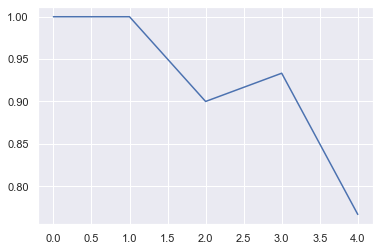

In [179]:
plt.plot(sl)
plt.show()

## 다른 회귀분석 Other
- ElasticNet, SVR 은 파라미터 기반 알고리즘
- LR , Lasso , EL-P 가 제일 좋음
- 랜덤포레스트는 오버피팅

In [1]:
#import 
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

#### 데이터불러오기

In [3]:
# Load the Diabetes dataset
columns = "age sex bmi map tc ldl hdl tch ltg glu".split() # Declare the columns names
diabetes = datasets.load_diabetes() # Call the diabetes dataset from sklearn
df = pd.DataFrame(diabetes.data, columns=columns) # load the dataset as a pandas data frame
y = diabetes.target # define the target variable (dependent variable) as y
df.head()

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [4]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
#(353, 10) (353,)
#(89, 10) (89,)

(353, 10) (353,)
(89, 10) (89,)


In [5]:
# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

## Linear Regression(LR) 정확도

In [6]:
print('The R^2 of Linear Regression on training set: {:.2f}'
     .format(model.score(X_train, y_train)))
print('The R^2 of Linear Regression on test set: {:.2f}'
     .format(model.score(X_test, y_test)))

The R^2 of Linear Regression on training set: 0.52
The R^2 of Linear Regression on test set: 0.49


## Ridge Regression(RR) 정확도
- 정규화된 선형 회귀 모형
- λ parameter 사용

In [7]:
###Model Ridge regression
from sklearn.linear_model import Ridge
model_ridge = Ridge()
model_ridge.fit(X_train, y_train)
print('The R^2 of Ridge classifier on training set: {:.2f}'
     .format(model_ridge.score(X_train, y_train)))
print('The R^2 of Ridge classifier on test set: {:.2f}'
     .format(model_ridge.score(X_test, y_test)))

The R^2 of Ridge classifier on training set: 0.44
The R^2 of Ridge classifier on test set: 0.39


## Lasso(least absolute shrinkage selector operator) Regression 정확도

In [8]:
###Model Lasso regression
from sklearn.linear_model import LassoCV
model_lasso = LassoCV()
model_lasso.fit(X_train, y_train)
print('The R^2 of Lasso classifier on training set: {:.2f}'
     .format(model_lasso.score(X_train, y_train)))
print('The R^2 of Lasso classifier on test set: {:.2f}'
     .format(model_lasso.score(X_test, y_test)))

The R^2 of Lasso classifier on training set: 0.52
The R^2 of Lasso classifier on test set: 0.48


## Elastic Net (EL) 정확도
-(alpha=0.001, l1_ratio=0.5, normalize=False) 

In [9]:
from sklearn.linear_model import ElasticNet
model_eln = ElasticNet()
model_eln.fit(X_train, y_train)
print('The R^2 of ElasticNet classifier on training set: {:.2f}'
     .format(model_eln.score(X_train, y_train)))
print('The R^2 of ElasticNet classifier on test set: {:.2f}'
     .format(model_eln.score(X_test, y_test)))

The R^2 of ElasticNet classifier on training set: 0.01
The R^2 of ElasticNet classifier on test set: 0.01


In [10]:
model_eln = ElasticNet(alpha=0.001, l1_ratio=0.5, normalize=False)
model_eln.fit(X_train, y_train)
print('The R^2 of ElasticNet classifier on training set: {:.2f}'
     .format(model_eln.score(X_train, y_train)))
print('The R^2 of ElasticNet classifier on test set: {:.2f}'
     .format(model_eln.score(X_test, y_test)))



The R^2 of ElasticNet classifier on training set: 0.51
The R^2 of ElasticNet classifier on test set: 0.47


## Random Forest Regression 정확도
- 오버피팅

In [12]:
###Model Random Forest regression
from sklearn.ensemble import RandomForestRegressor
model_RFR = RandomForestRegressor()
model_RFR.fit(X_train, y_train)
print('The R^2 of RFR classifier on training set: {:.2f}'
     .format(model_RFR.score(X_train, y_train)))
print('The R^2 of RFR classifier on test set: {:.2f}'
     .format(model_RFR.score(X_test, y_test)))

The R^2 of RFR classifier on training set: 0.92
The R^2 of RFR classifier on test set: 0.45


## Support Vector Regression 정확도

In [13]:
from sklearn.svm import SVR
svm = SVR()
svm.fit(X_train, y_train)
print('The R^2 of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('The R^2 of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

The R^2 of SVM classifier on training set: 0.19
The R^2 of SVM classifier on test set: 0.13


In [14]:
from sklearn.svm import SVR
svm = SVR(kernel='linear', C=100000, gamma='auto')
svm.fit(X_train, y_train)
print('The R^2 of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('The R^2 of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

The R^2 of SVM classifier on training set: 0.52
The R^2 of SVM classifier on test set: 0.47


In [15]:
from sklearn.svm import SVR
svm = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svm.fit(X_train, y_train)
print('The R^2 of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('The R^2 of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

The R^2 of SVM classifier on training set: 0.30
The R^2 of SVM classifier on test set: 0.23


# Other_classification

In [16]:
#import the necessary packages
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt


In [17]:
fruits = pd.read_table('https://raw.githubusercontent.com/Starignus/AppliedML_Python_Coursera/master/fruit_data_with_colors.txt')
#fruits = pd.read_table('data/fruit_data_with_colors.txt')
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [19]:
print(fruits.groupby('fruit_name').size())

fruit_name
apple       19
lemon       16
mandarin     5
orange      19
dtype: int64


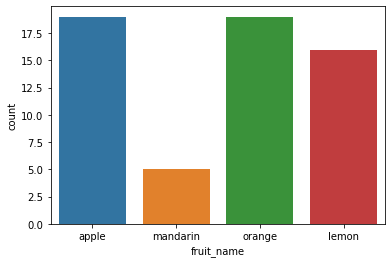

In [18]:
import seaborn as sns
sns.countplot(fruits['fruit_name'],label="Count")
plt.show()

## 시각화

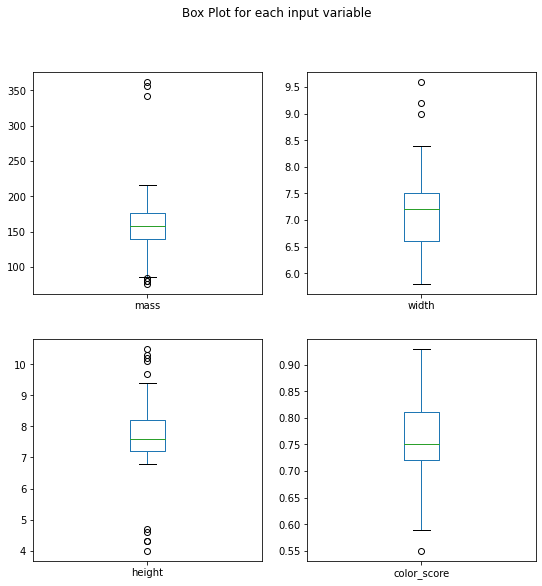

In [20]:
fruits.drop('fruit_label', axis=1).plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(9,9), 
                                        title='Box Plot for each input variable')
plt.savefig('fruits_box')
plt.show()

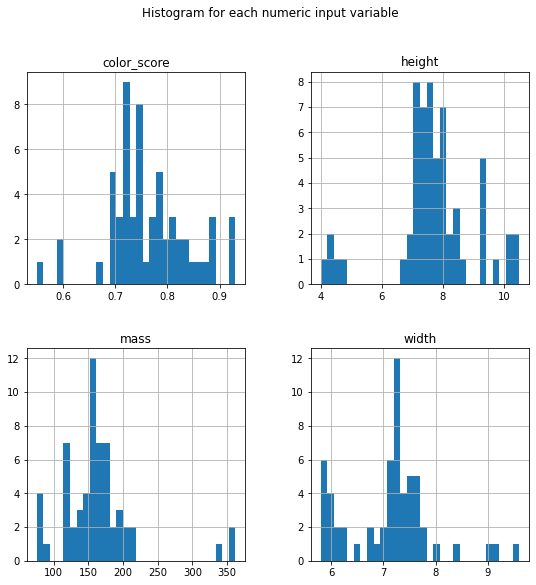

In [21]:
import pylab as pl
fruits.drop('fruit_label' ,axis=1).hist(bins=30, figsize=(9,9))
pl.suptitle("Histogram for each numeric input variable")
plt.savefig('fruits_hist')
plt.show()

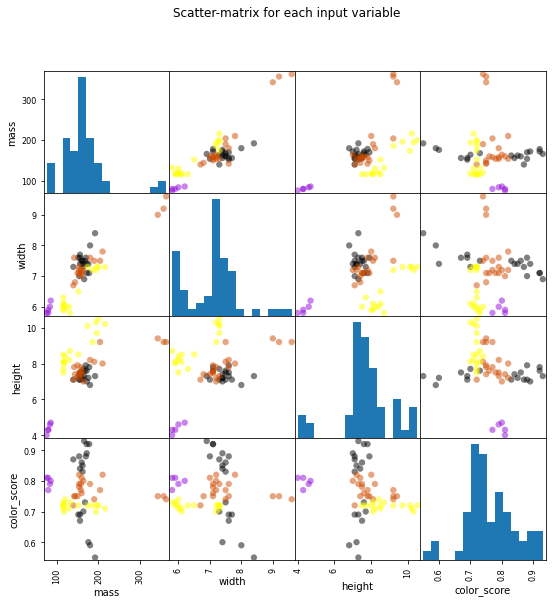

In [22]:
import pandas as pd
from matplotlib import cm
feature_names = ['mass', 'width', 'height', 'color_score']
X = fruits[feature_names]
y = fruits['fruit_label']
cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X, c = y, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap = cmap)
plt.suptitle('Scatter-matrix for each input variable')
plt.savefig('fruits_scatter_matrix')

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.73


In [26]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.75
Accuracy of Logistic regression classifier on test set: 0.47


In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.95
Accuracy of K-NN classifier on test set: 1.00


In [28]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

Accuracy of LDA classifier on training set: 0.86
Accuracy of LDA classifier on test set: 0.67


In [29]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.86
Accuracy of GNB classifier on test set: 0.67


In [30]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.91
Accuracy of SVM classifier on test set: 0.80


In [31]:
# Load scikit's random forest classifier library
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier() #n_jobs=2, random_state=0
clf.fit(X_train, y_train)
print('Accuracy of RFC classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of RFC classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of RFC classifier on training set: 1.00
Accuracy of RFC classifier on test set: 0.87


In [32]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[4 0 0 0]
 [0 1 0 0]
 [0 0 8 0]
 [0 0 0 2]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         2

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



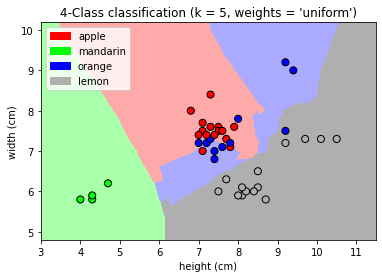

In [33]:
import numpy as np
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches
import matplotlib.patches as mpatches
X = fruits[['mass', 'width', 'height', 'color_score']]
y = fruits['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
def plot_fruit_knn(X, y, n_neighbors, weights):
    X_mat = X[['height', 'width']].values
    y_mat = y.values
# Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF','#AFAFAF'])
    cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#AFAFAF'])
    clf = KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_mat, y_mat)
# Plot the decision boundary by assigning a color in the color map
    # to each mesh point.
    
    mesh_step_size = .01  # step size in the mesh
    plot_symbol_size = 50
    
    x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
    y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                         np.arange(y_min, y_max, mesh_step_size))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
# Plot training points
    plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=y, cmap=cmap_bold, edgecolor = 'black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    patch0 = mpatches.Patch(color='#FF0000', label='apple')
    patch1 = mpatches.Patch(color='#00FF00', label='mandarin')
    patch2 = mpatches.Patch(color='#0000FF', label='orange')
    patch3 = mpatches.Patch(color='#AFAFAF', label='lemon')
    plt.legend(handles=[patch0, patch1, patch2, patch3])
    
    plt.xlabel('height (cm)')
    plt.ylabel('width (cm)')
    plt.title("4-Class classification (k = %i, weights = '%s')" % (n_neighbors, weights))    
    plt.show()
    
plot_fruit_knn(X_train, y_train, 5, 'uniform')

- 범주나누기, low,high,medium
------------------------
nums = f['Number of use cases']
low_range = (nums >= 0) & (nums <= 4)
f.loc[low_range, 'Number of use cases'] = 'low'
medium_range = (nums > 4) & (nums <= 12)
f.loc[medium_range, 'Number of use cases'] = 'medium'
high_range = (nums > 12) 
f.loc[high_range, 'Number of use cases'] = 'high'

association - 연관분석 범주나누기
- im['length'] = np.where(im['length']<=im['length'].mean(),'Len_Short', 'Len_Long')

## str.split( ,1)  
### 1은 최대 한번만 나눠라 라는 의미
- Carprice['Brand']=Carprice.CarName.str.split(" ",1)
- Audi RS5 -> [Audi , RS5]

## str.get(0)
### 값 중에 0번째것 반환
- Carprice['brand']=Carprice.Brand.str.get(0)
-  [Audi , RS5] =>  Audi

## sns.countplot 시각화
### sns.countplot(x =Carprice.brand , data=Carprice)
### 브랜드별 개수에 대한 plot 
### 범주형1개 수치형1개
### Carprice.brand.value_counts() 를 통해 가장 많은 count 확인
### sns.barplot(x, y,data) 
#### 바플롯은 반드시 reset_index를 해야함.

## 의진 
### t-test
- from scipy.stats import ttest_ind
- C1=Carprice[Carprice['carbody']=='sedan'][['carlength']]
- C2=Carprice[Carprice['carbody']=='hatchback'][['carlength']]
- ttest,pval = ttest_ind(C1,C2)
print("ttest", ttest)
print("p-value",pval)

if pval <0.05:
    print("we reject null hypothesis")
else:
    print("we fail to reject (accept) null hypothesis")

## map / high / low
- Carprice2['label']=Carprice2.label.map({1:'high',0:'low'})